# Spam vs Non-Spam: Business Case



You are working in Google and have a task to create an Email spam detection model

Here,
- **not spam** → Class 0
- **spam** → Class 1

<br>




**Note:** For simplicity, lets call:
-  Class 0 **Not Spam** as Negative Class
- and Class 1 **Spam** as Positive Class



Lets Load the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!gdown 1CgBW5H54YfdYtJmYE5GWctaHZSpFt71V

Downloading...
From: https://drive.google.com/uc?id=1CgBW5H54YfdYtJmYE5GWctaHZSpFt71V
To: /content/spam_ham_dataset.csv
100% 5.50M/5.50M [00:00<00:00, 103MB/s]


In [4]:
demo1 = pd.read_csv('spam_ham_dataset.csv')
demo1.drop(['Unnamed: 0','label'],axis=1,inplace=True)
demo1.head()

text  label_num
0  Subject: enron methanol ; meter # : 988291\r\n...          0
1  Subject: hpl nom for january 9 , 2001\r\n( see...          0
2  Subject: neon retreat\r\nho ho ho , we ' re ar...          0
3  Subject: photoshop , windows , office . cheap ...          1
4  Subject: re : indian springs\r\nthis deal is t...          0

**Data Description**
<center>

| Records | Features |
| :-- | :-- |
| 5171 | 2 |


| Id | Features | Description |
| :-- | :--| :--|
|01| **text** |email text|
|02| **label_num** |0 → Not Spam, 1 → Spam|

**Observe**

As the whole data is in textual format, we use:
- Some advance Natural Language technique (which you will learn in later modules)
- To convert the text into numerical features

In [5]:
!gdown 1dw56R8SzKgTgiKurfBLUTxmiewJacMkt

Downloading...
From: https://drive.google.com/uc?id=1dw56R8SzKgTgiKurfBLUTxmiewJacMkt
To: /content/Spam_finalData.csv
100% 1.64M/1.64M [00:00<00:00, 119MB/s]


In [6]:
dt = pd.read_csv('Spam_finalData.csv')

In [7]:
dt.head()

label_num  Feature0  Feature1  Feature2  Feature3  Feature4  Feature5  \
0          0 -0.031489 -0.003323 -0.071238  0.047743  0.060798  0.046597   
1          0 -0.122601  0.114176  0.460451  0.000953  0.014707  0.007610   
2          0 -0.076681 -0.084330 -0.054658 -0.048236 -0.019999 -0.045909   
3          1 -0.075948 -0.059706 -0.025301 -0.037603 -0.001208 -0.030660   
4          0 -0.054680  0.033033 -0.090885 -0.047280 -0.029304  0.085893   

   Feature6  Feature7  Feature8  Feature9  Feature10  Feature11  Feature12  \
0 -0.069530 -0.000031 -0.037924  0.024059  -0.015085  -0.007752  -0.021617   
1 -0.011173 -0.052478  0.040209  0.000076   0.010306   0.023397  -0.007294   
2 -0.004712 -0.001524  0.013735 -0.022429   0.010273  -0.007458  -0.044340   
3  0.018873 -0.013434 -0.014981  0.000741   0.005653   0.032153   0.001884   
4 -0.105351 -0.053915 -0.006857  0.021673   0.056718   0.006140   0.042217   

   Feature13  Feature14  
0  -0.025395   0.046050  
1   0.063543   0.081119  
2  -0.051093   0.025553  
3  -0.018005  -0.011060  
4   0.018862  -0.007373

**observe**

The text feature is now converted to 15 features [```Feature0 - Feature14 ```] with numerical values

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(dt.drop(['label_num'],axis=1),dt['label_num'])

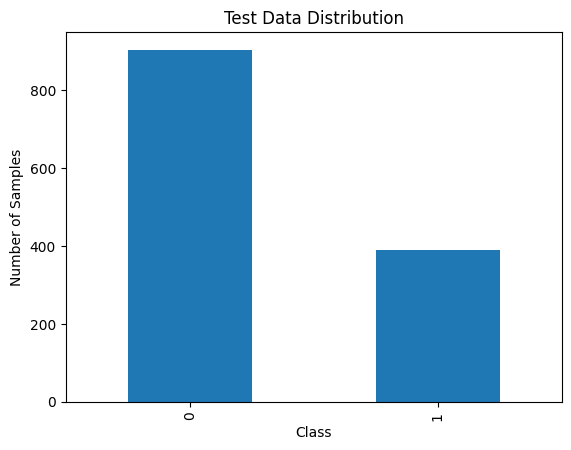

In [9]:
y_test.value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Test Data Distribution')
plt.show()

**Observe**

In the data, samples of **spam** (class 0 ) $\approx 850$ and samples of **not Spam** (class1) $\approx 350$. This means:

- **spam** $\approx \frac{850}{1200} \times 100 = 70.83$ %
- **Not spam** $\approx \frac{350}{1200} \times 100 = 29.17$ %

<br>

**note:**  As the data distribution is irregular, meaning one class dominates the other, this is known as **imbalance Data**

In [10]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
model.fit(X_train,y_train)


LogisticRegression()

In [11]:
print('Model Accuracy:',model.score(X_test,y_test))

Model Accuracy: 0.9327146171693735


#### Is this model with accuracy 93.5% a good one ?


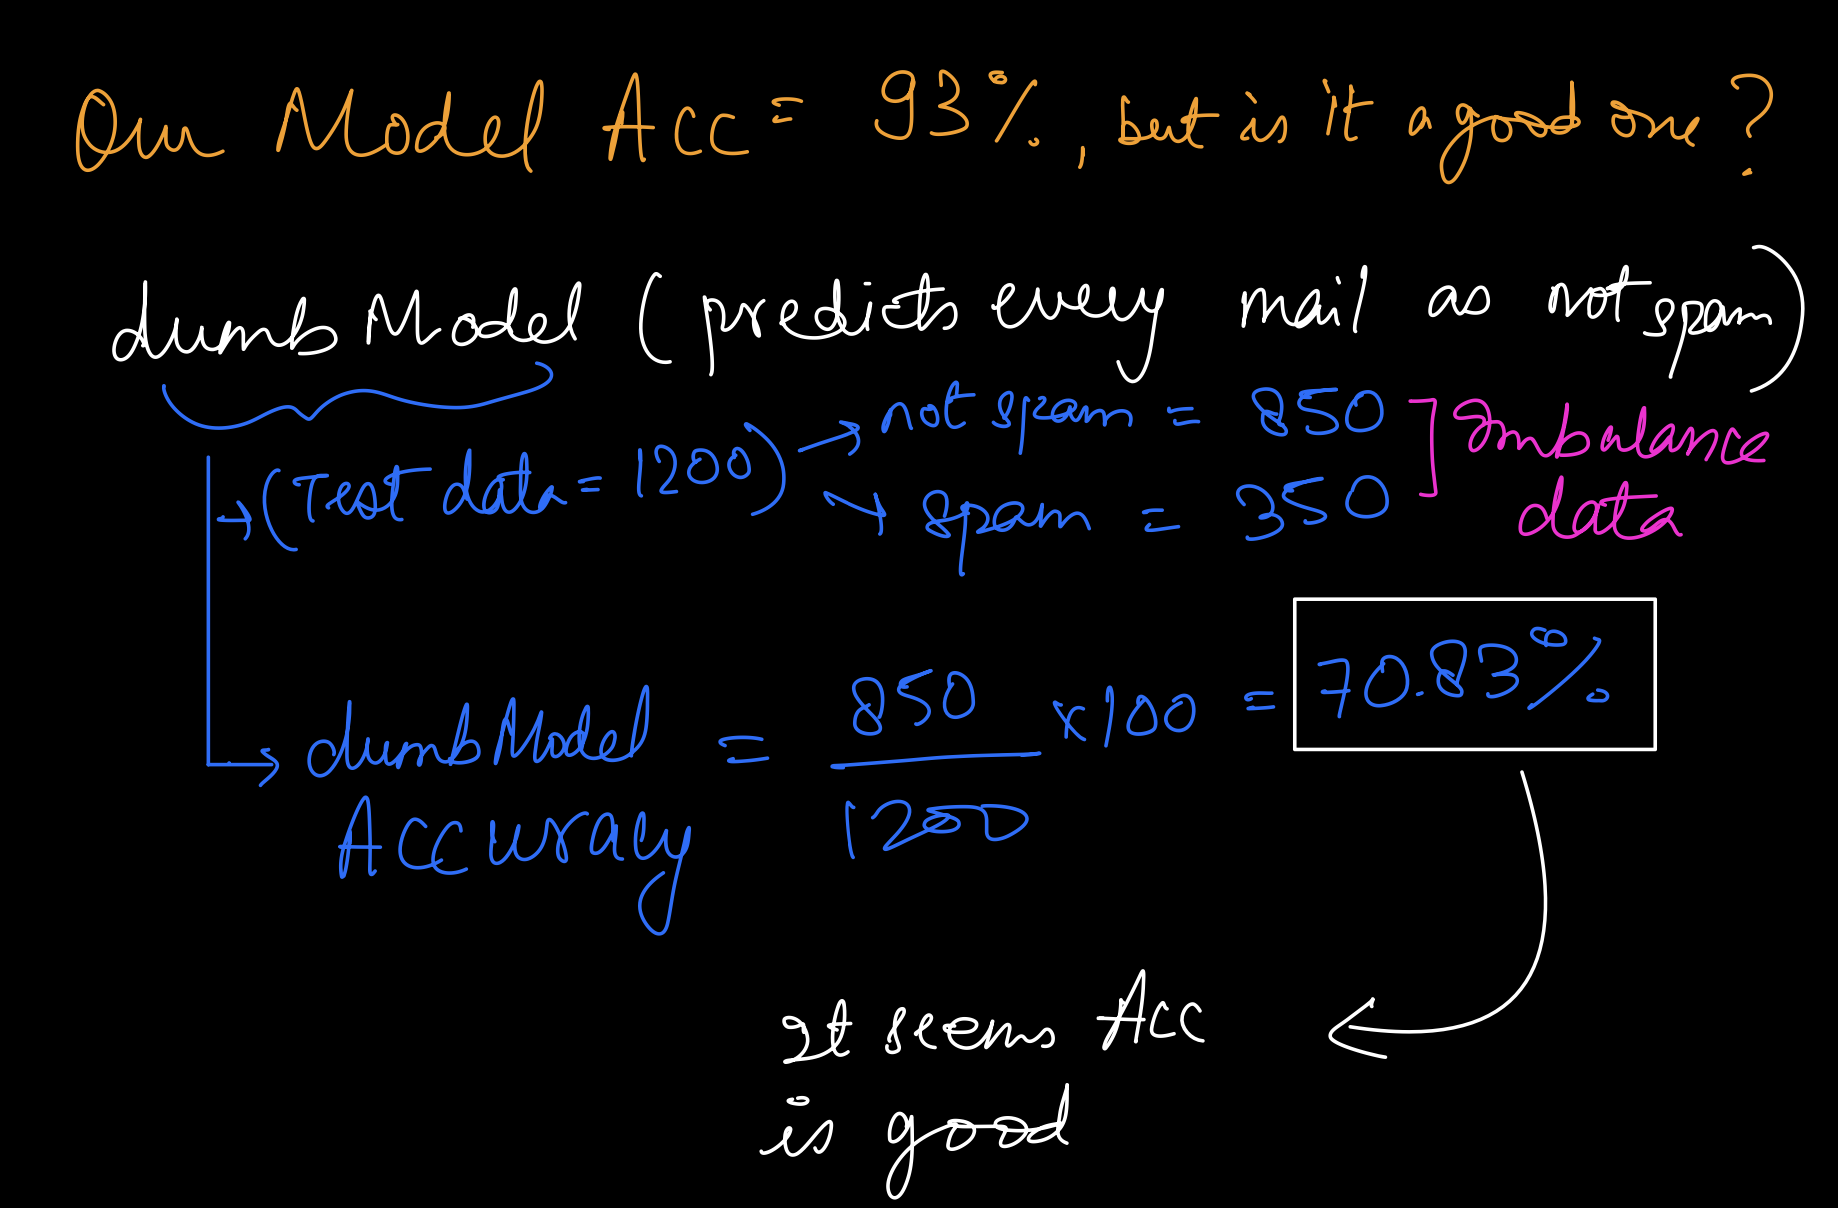


Ans: Lets consider a dumb model which only predicts email as **Not Spam** (Class 0), then:

- Accuracy = $\frac{850}{1200} \times 100 = 70.83$%

<br>


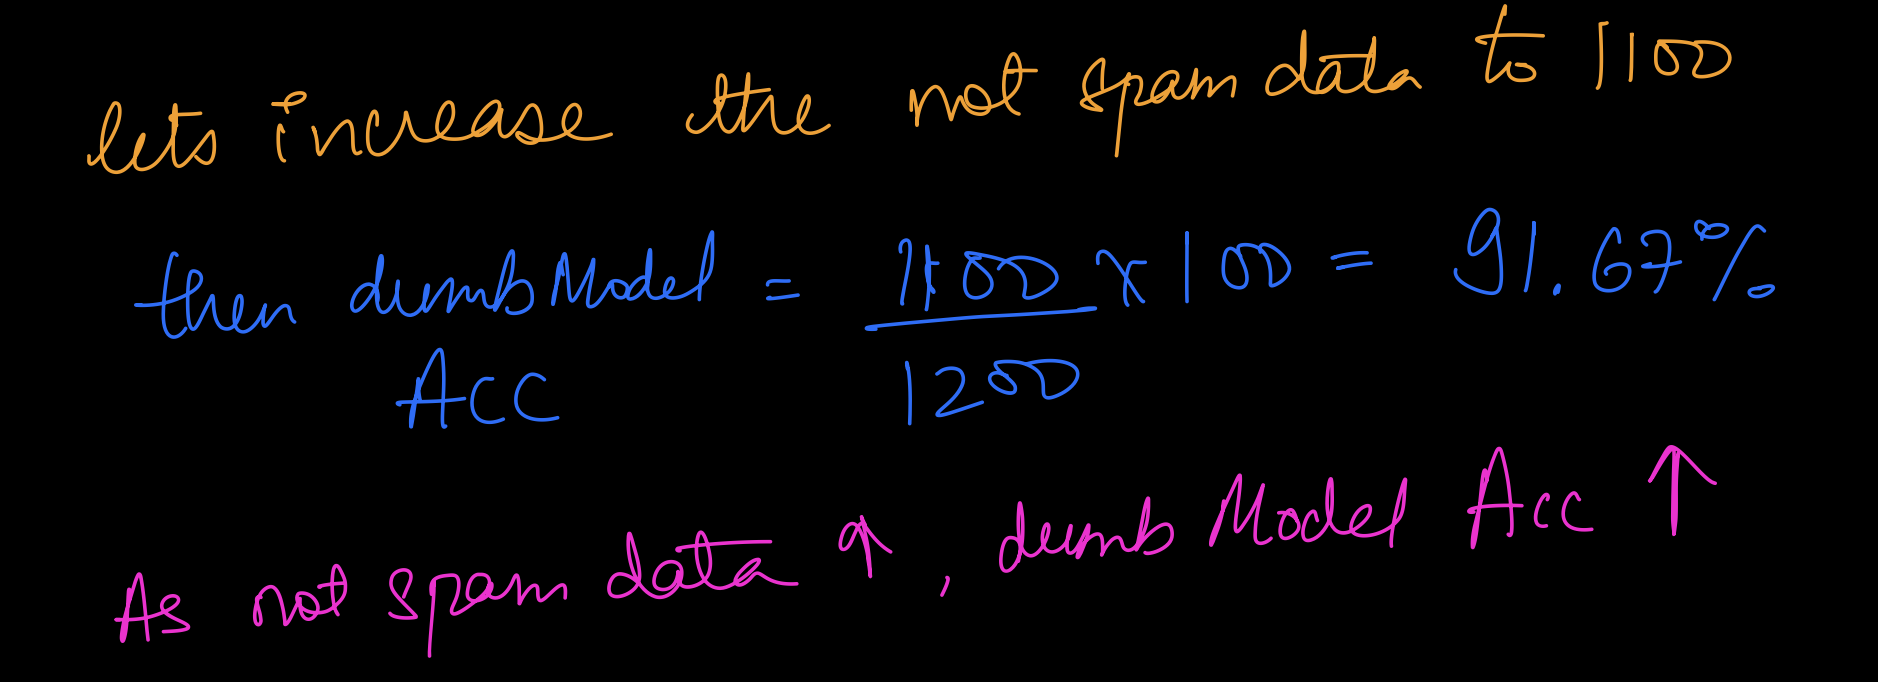


if, **spam = 100** and **not spam = 1100**
 - Then dumb model accuracy = $\frac{1100}{1200} \times 100 = 91.67$%

<br>

**observe:**

As the number of sample increases for not spam:
- The dumb model accuracy increases.
- Even though it is not able to classify **Spam** emails









# **Issue with Accuracy Metric**

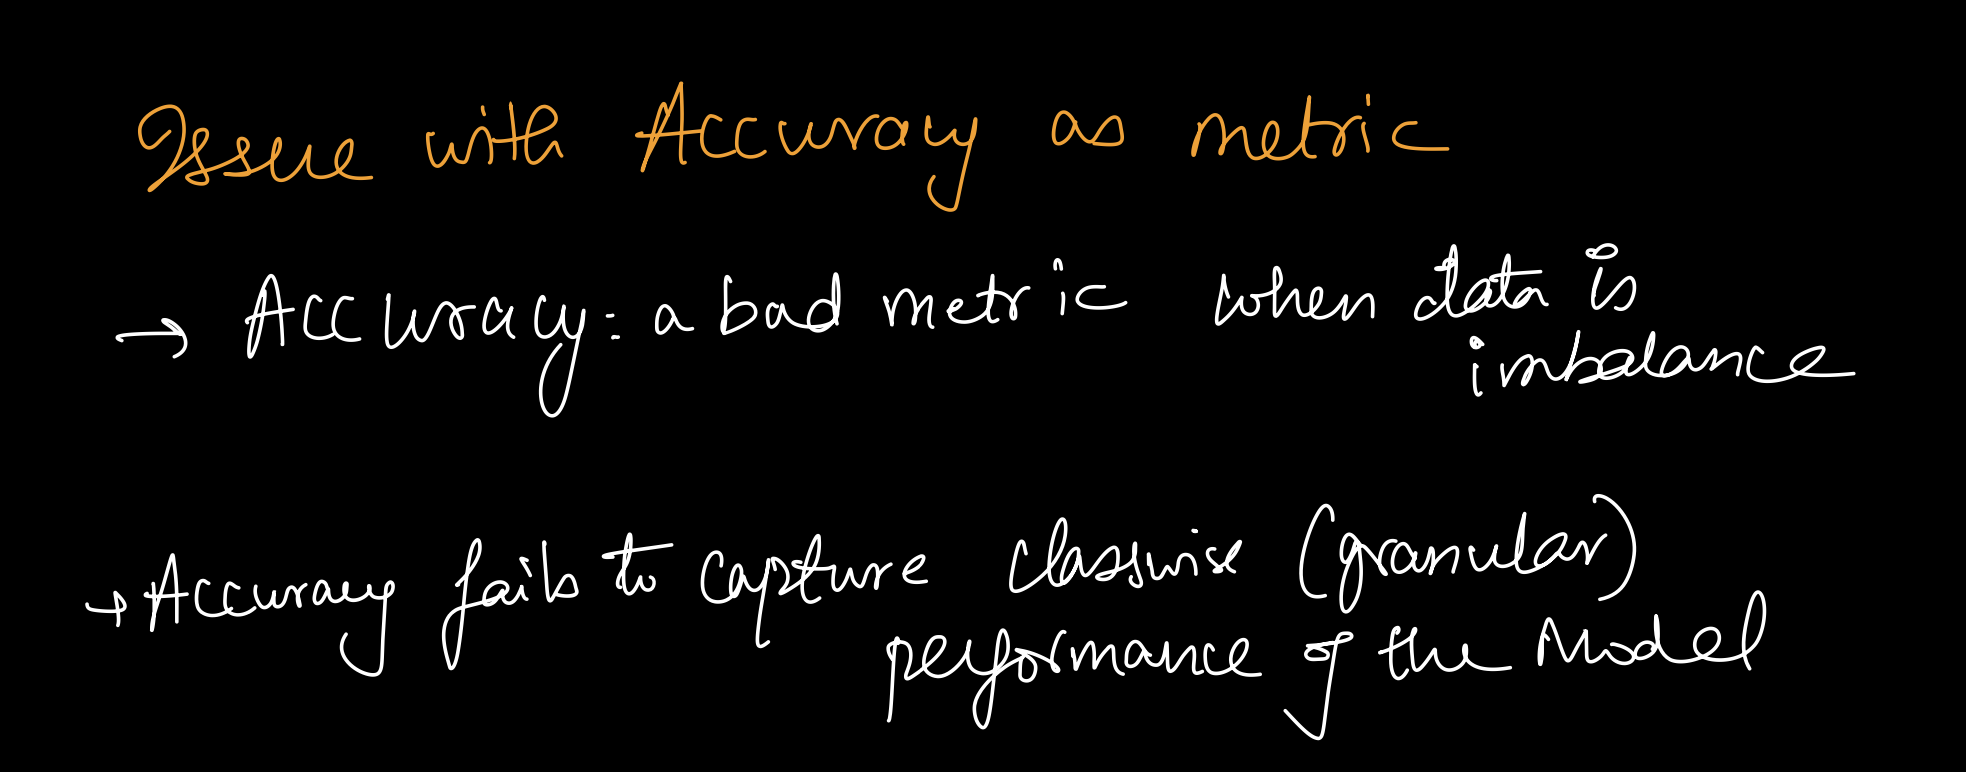

#### What causes the accuracy to be a bad metric ?

1. Accuracy **doesn't work** when we have **imbalanced dataset**
2. As our **major goal** is to **correctly classify Spam data**,
 - Accuracy **lacks** in providing a **class-wise/granular metric**



# **Confusion Matrix**



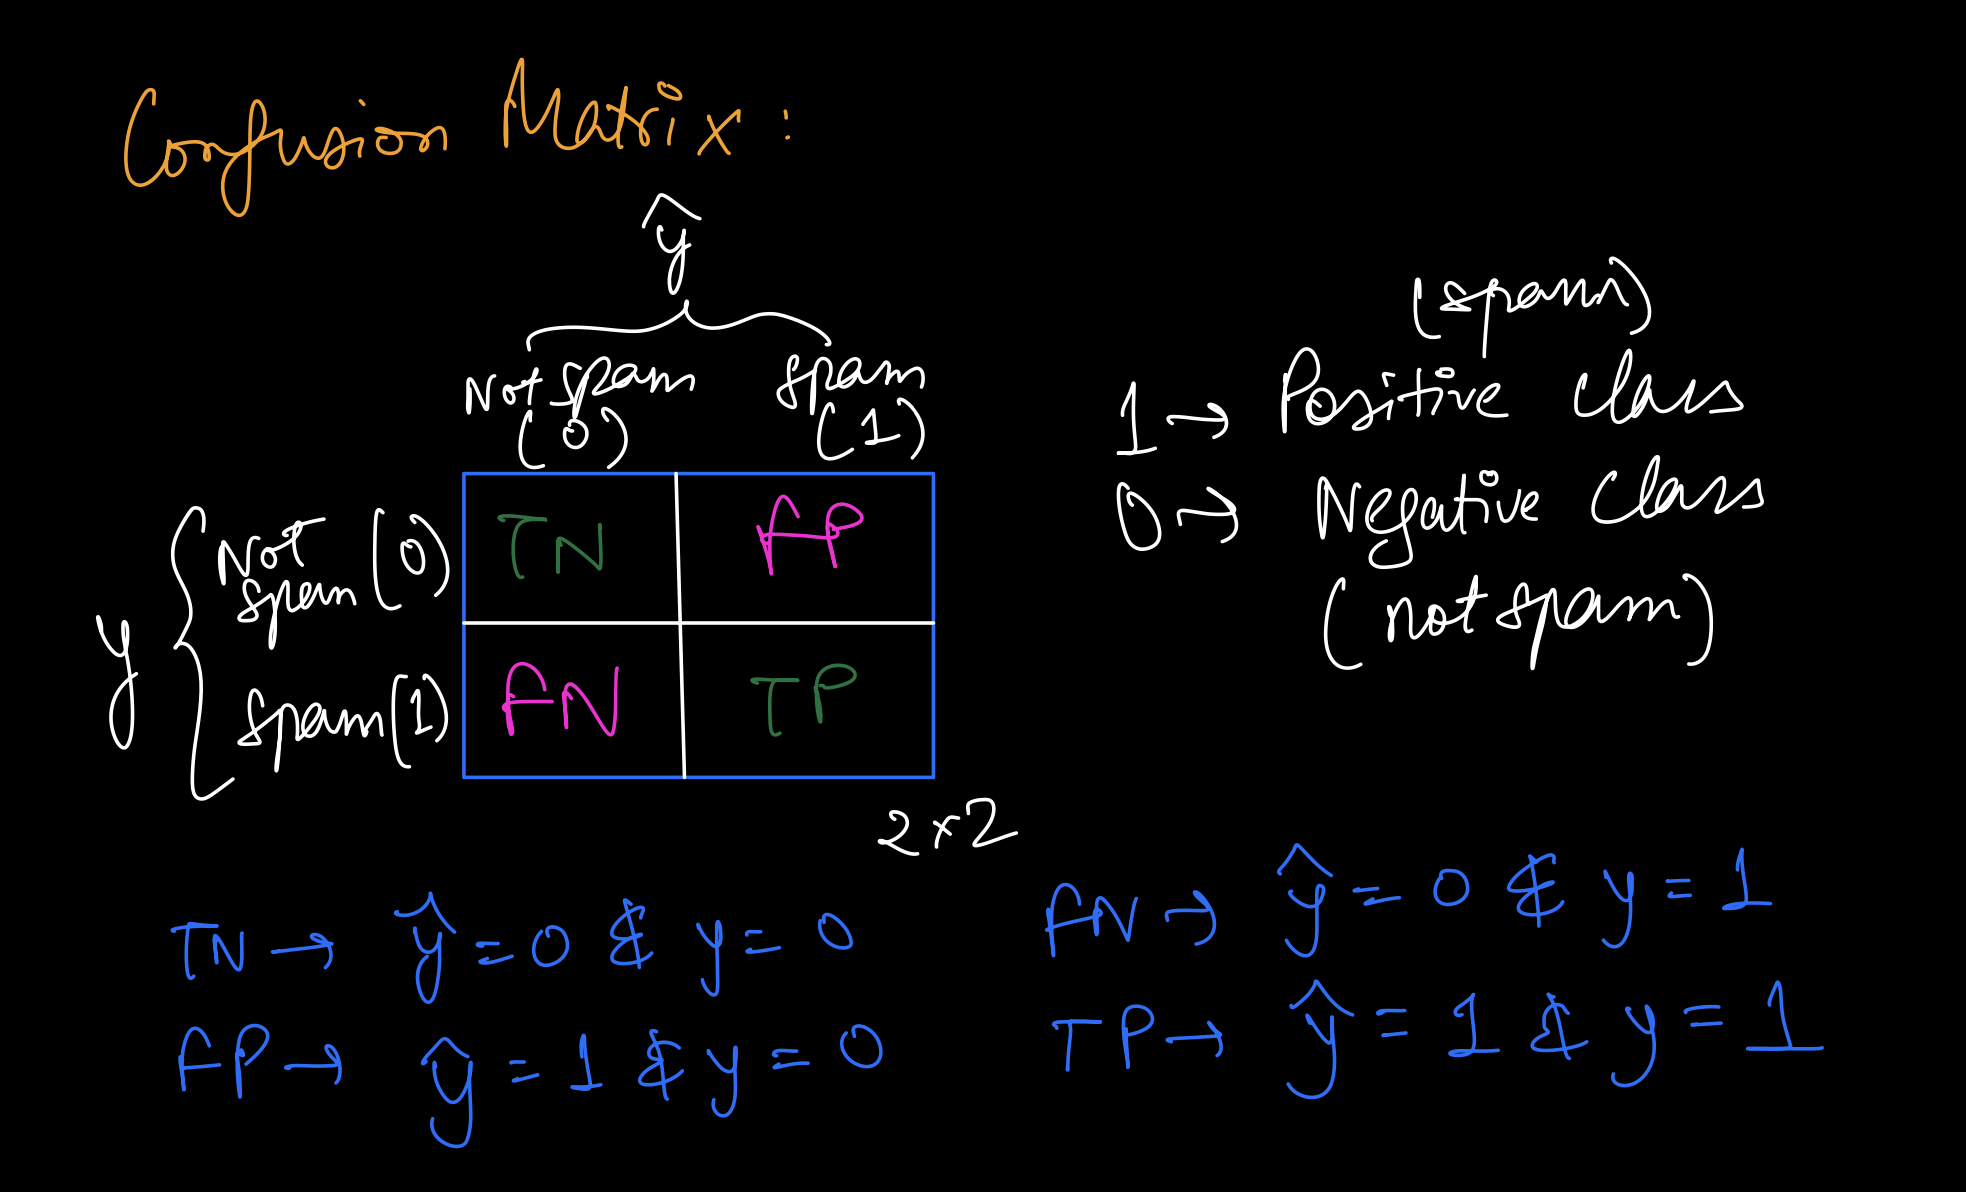

#### What kind of metric is required to overcome issues in accuracy  ?
Ans: A metric which measures **number of datapoints** are being:
1. correctly predicted in each class
2. incorrectly predicted in each class

<br>

Lets create a 2 x 2 matrix for Spam (**Class 1/positive class)** and Not Spam (**Class0/Negative Class**), such that:

1. For the first cell we keep the count of samples
 - where $\hat{y_i} = 0 $, and  and $y_i = 0$
 - Lets call this **True Negative (TN)**

2. For the second cell we keep the count of samples
 - where $\hat{y_i} = 1 $, and  and $y_i = 0$
 - Lets call this **False Positive (FP)**

<br>

3. For the third cell we keep the count of samples
 - where $\hat{y_i} = 0 $, and  and $y_i = 1$
 - Lets call this **False Negative (FN)**

4. For the fourth cell we keep the count of samples
 - where $\hat{y_i} = 1 $, and  and $y_i = 1$
 - Lets call this **True Positive (TP)**


<br>


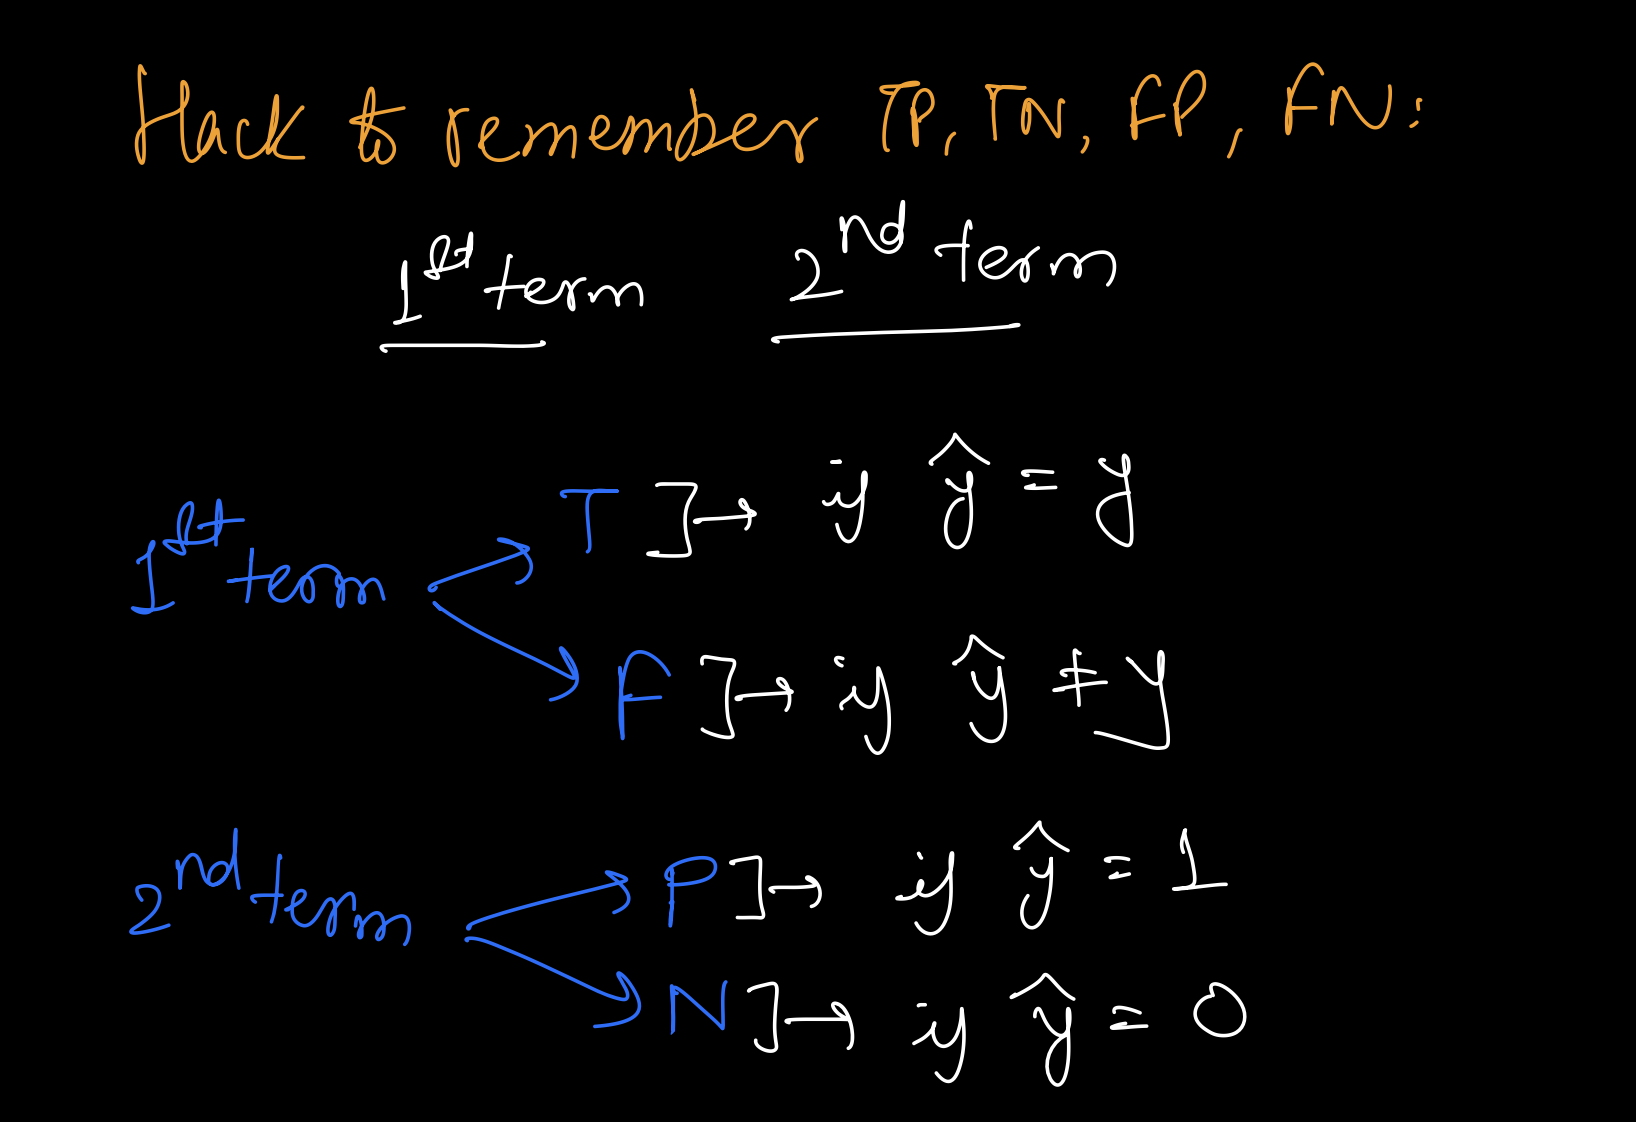

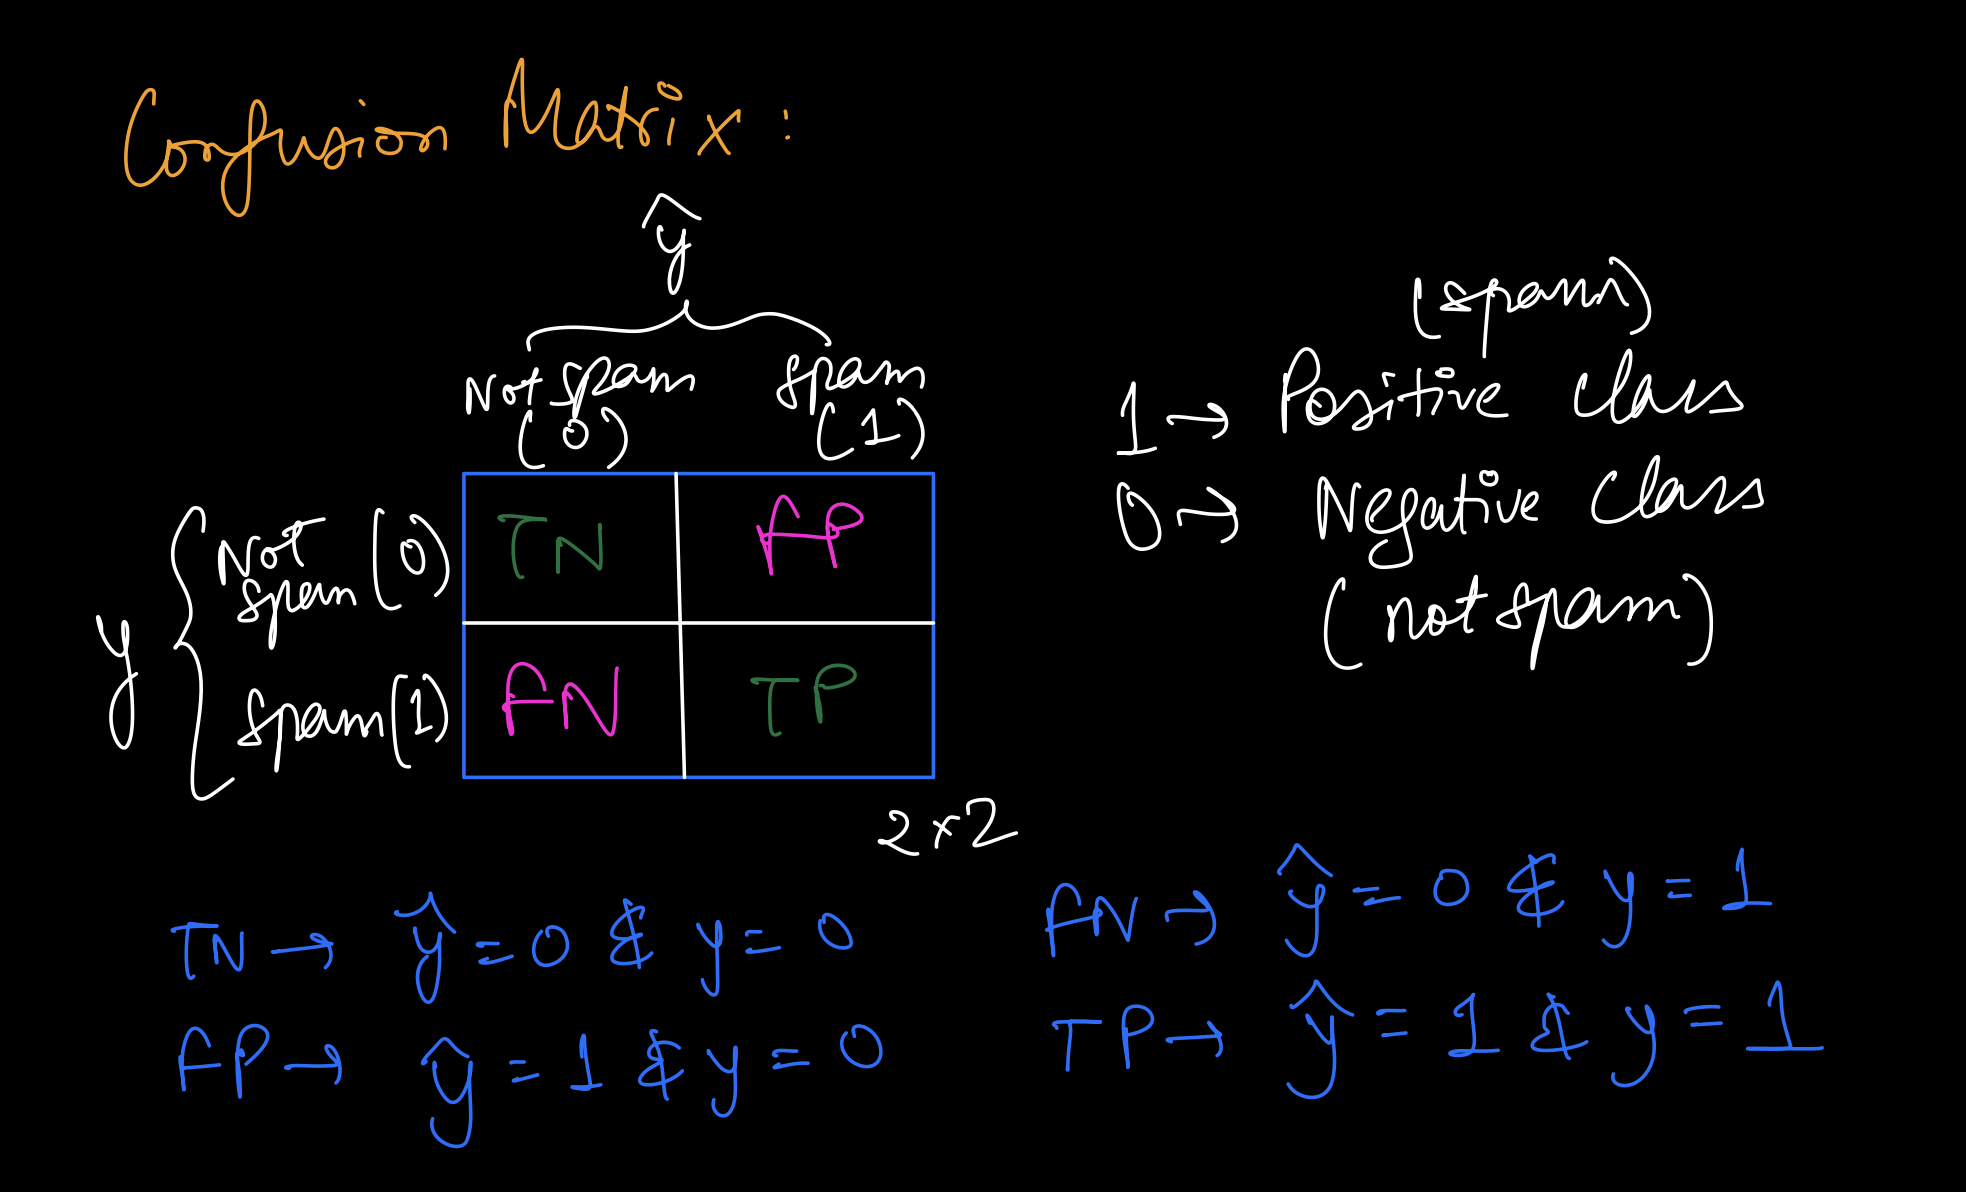

#### What kind of metric is required to overcome issues in accuracy  ?
Ans: A metric which measures **number of datapoints** are being:
1. correctly predicted in each class
2. incorrectly predicted in each class

<br>

Lets create a 2 x 2 matrix for Spam (**Class 1/positive class)** and Not Spam (**Class0/Negative Class**), such that:

1. For the first cell we keep the count of samples
 - where $\hat{y_i} = 0 $, and  and $y_i = 0$
 - Lets call this **True Negative (TN)**

2. For the second cell we keep the count of samples
 - where $\hat{y_i} = 1 $, and  and $y_i = 0$
 - Lets call this **False Positive (FP)**

<br>

3. For the third cell we keep the count of samples
 - where $\hat{y_i} = 0 $, and  and $y_i = 1$
 - Lets call this **False Negative (FN)**

4. For the fourth cell we keep the count of samples
 - where $\hat{y_i} = 1 $, and  and $y_i = 1$
 - Lets call this **True Positive (TP)**


<br>



Hack to remember which cell belong to **TP,TN,FP,FN**
1. For the first term:

- **1st term $== T$(True)**:
  - if the prediction is correct

- **1st term $== F$(False)**:
  - if the prediction is incorrect

2. For the second term:

- **2nd term $== P$(Positive)**:
  - if model predicts class 1 (positive class) data


- **2nd term $== N$(Negative)**:
  - if model predicts class 0 (negative class) data


<br>











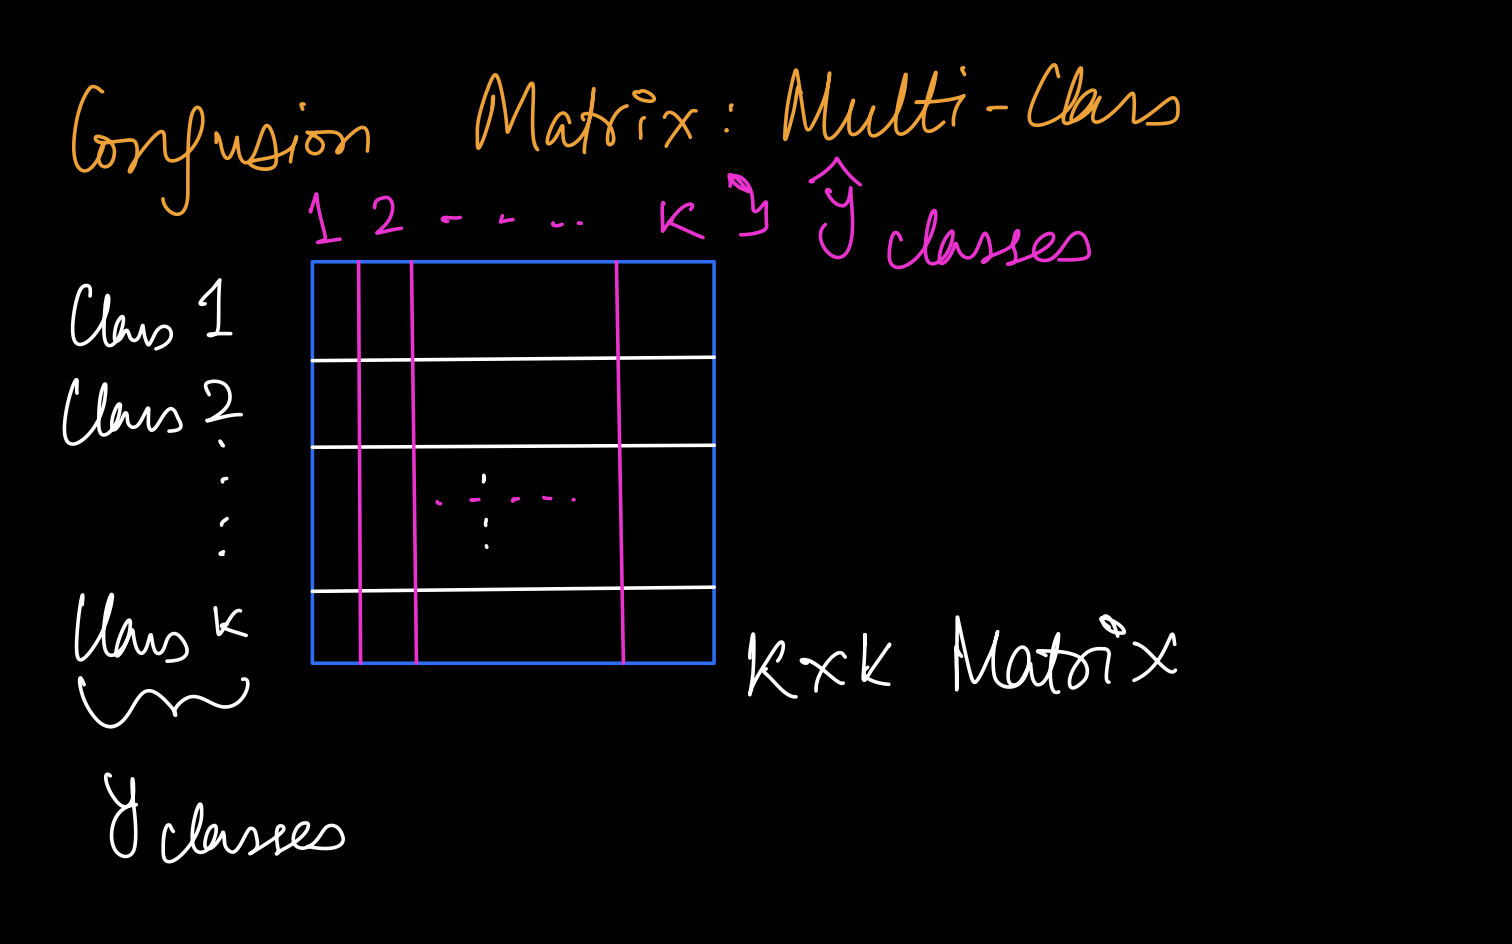

Such a 2 x 2 matrix is known as **Confusion Matrix**
- It can be **generalized for a multi-classification data**

Here, the confusion matrix → $k \times k $ matrix
- with $k →$ number of classes

## **Understanding Confusion Matrix**

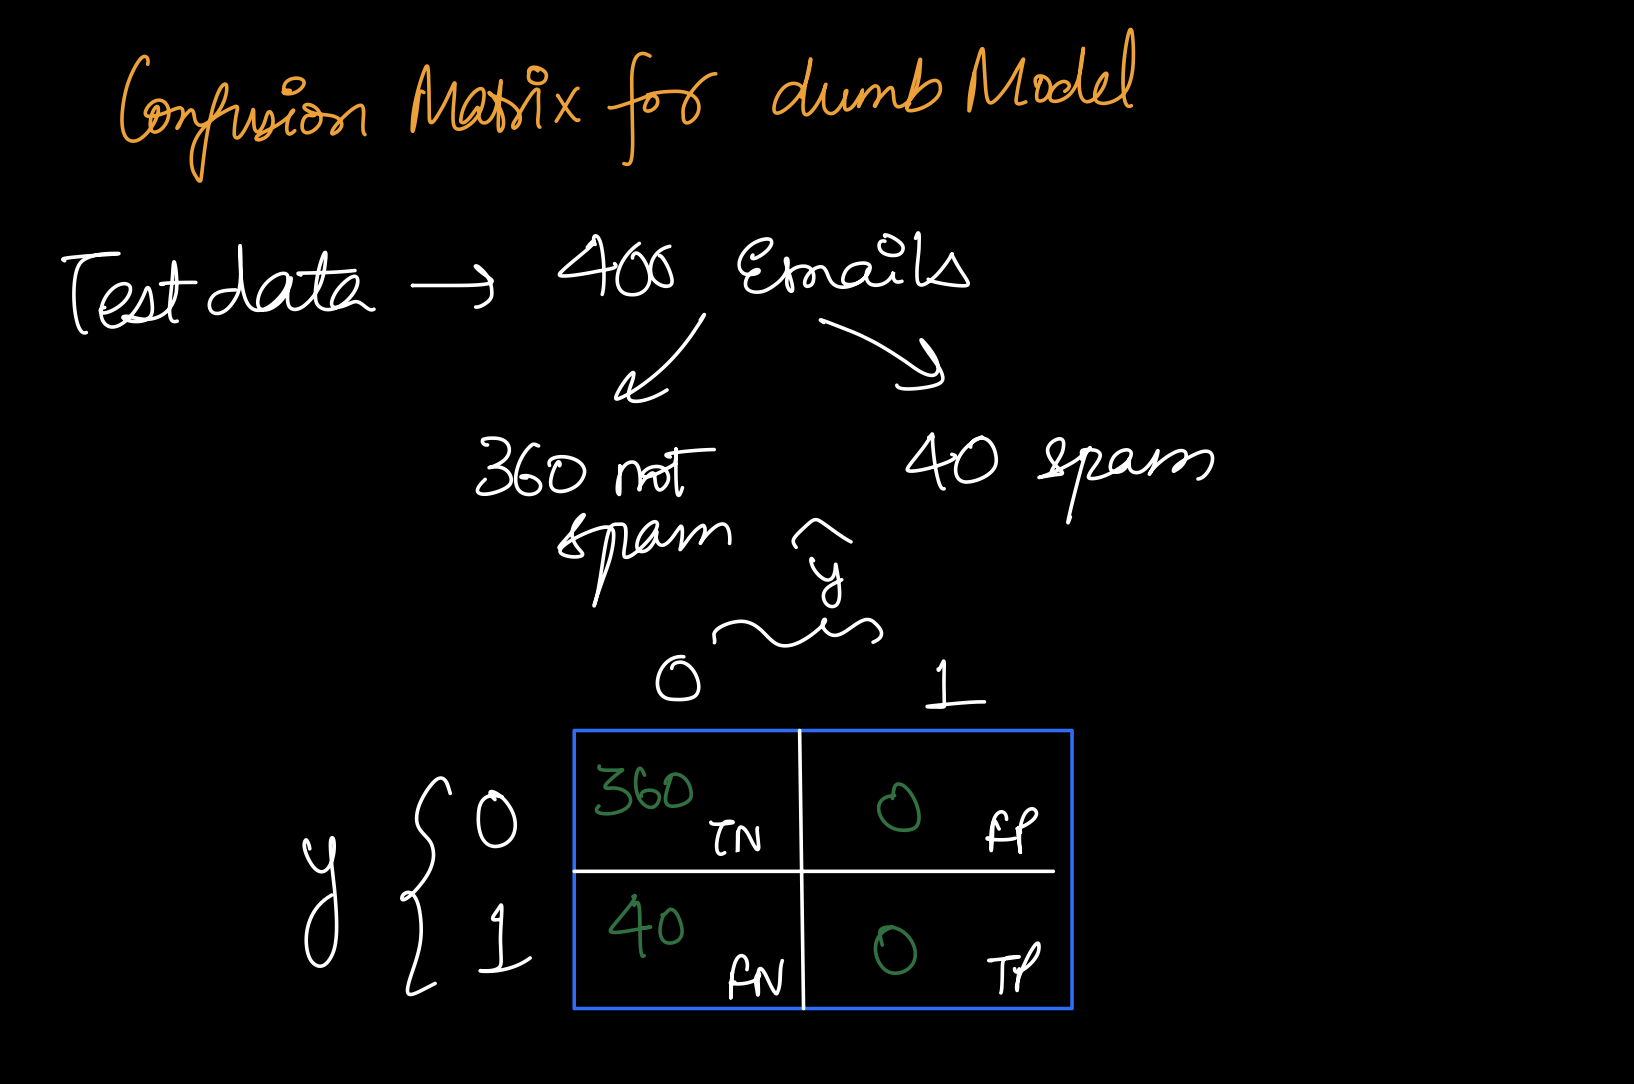

Lets understand how confusion matrix is created for:

1. A dumb model ( **predicts all emails as non-spam/Class 0** )

- if test data contains 400 emails:
 - 360 are non-spam
 - and 40 are spam

<br>

#### What will be the TP,FP for the dumb model ?

Ans: As model does not predict any sample as Spam(Class1), hence both **TP and FP $ = 0 $**

<br>

#### What will be the TN,FN for the dumb model ?

Ans: As model predicts all sample as not-spam(Class0)
- model correctly classifies 360 samples as not-spam,
- hence TN = 360

<br>

Also the dumb model will:
- incorrectly classify 40 spam (Class1) samples as not-spam
- Hence FN = 40

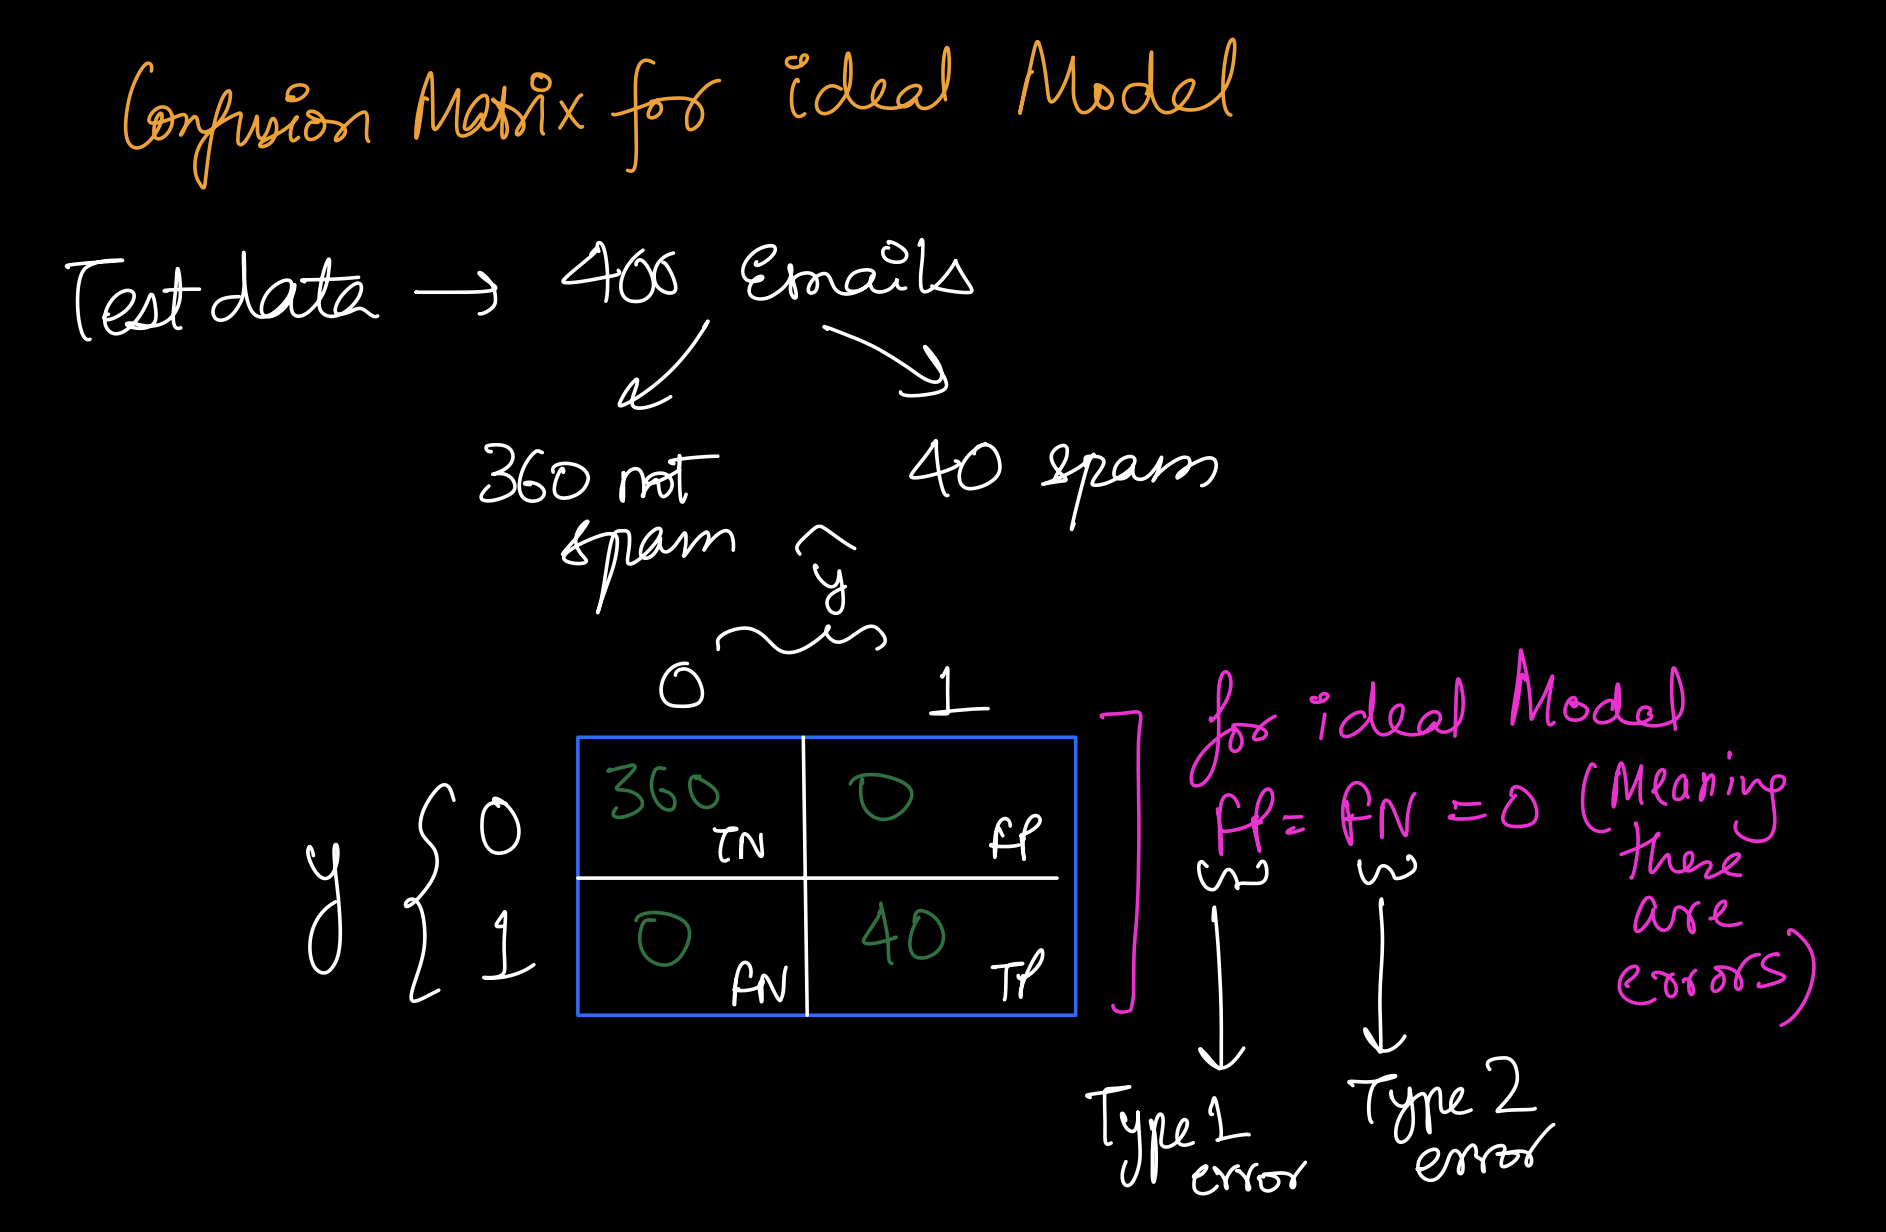

#### if the test data has 360 non-spam and 40 spam samples, then what will be **TF, TP, FP, FN** for an **ideal(Best) model** ?

Ans: As Ideal model will correctly classify every sample:
- Hence TP = 40, TN = 360

- And $FP = FN = 0$

<br>

**Observe**

As for Ideal model $FP=FN=0$, these become the error for the model

1. FP is called as **Type-1 error**
2. FN is called as **Type-2 error**


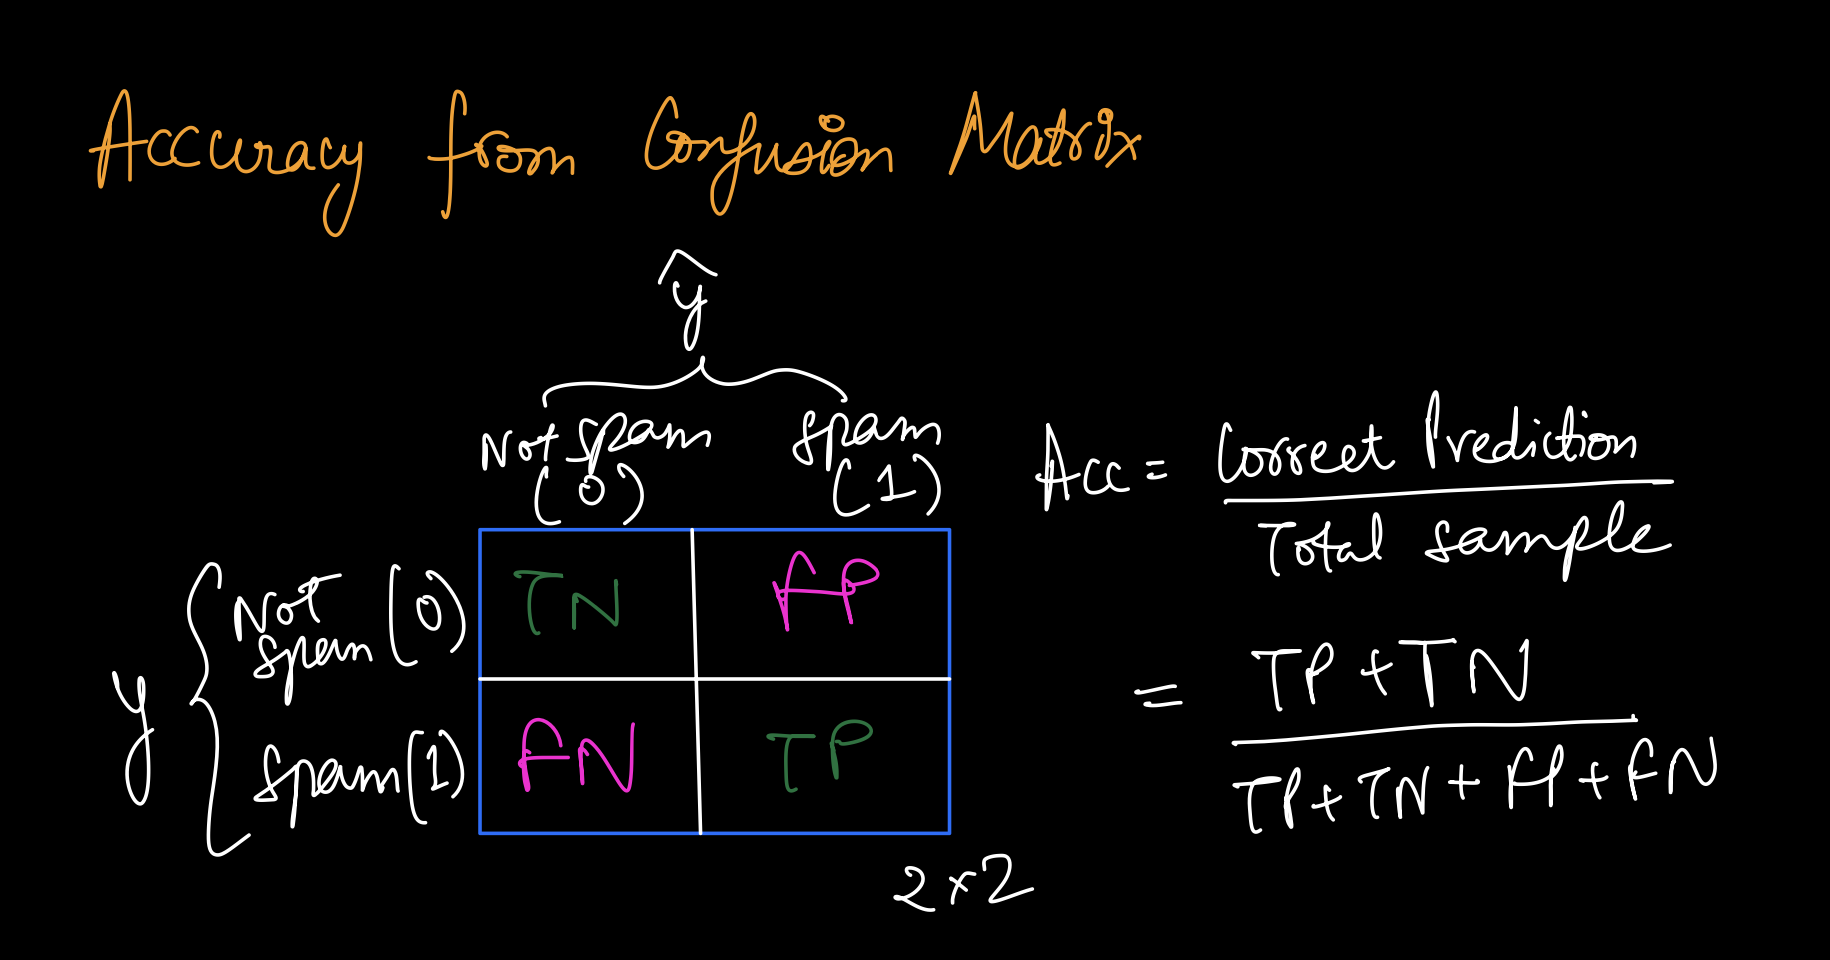

#### We have TP, TN , FP , FN, Can we find accuracy ?
Ans: Accuracy $\rightarrow$ measure of the **ratio of correct prediction to total samples**
- In Confusion Matrix, $TP+TN$ captures the correct prediction
- While, $TP+TN+FP+FN$ captures the total number of samples
<br>

Hence:
- $Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$


# **Confusion Matrix Code**

#### Lets use sklearn `confusion_matrix` function to get the values

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix # 2D np array

array([[842,  62],
       [ 25, 364]])

#### How do we know which one is what?

Lets check the sklearn [documentation ](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

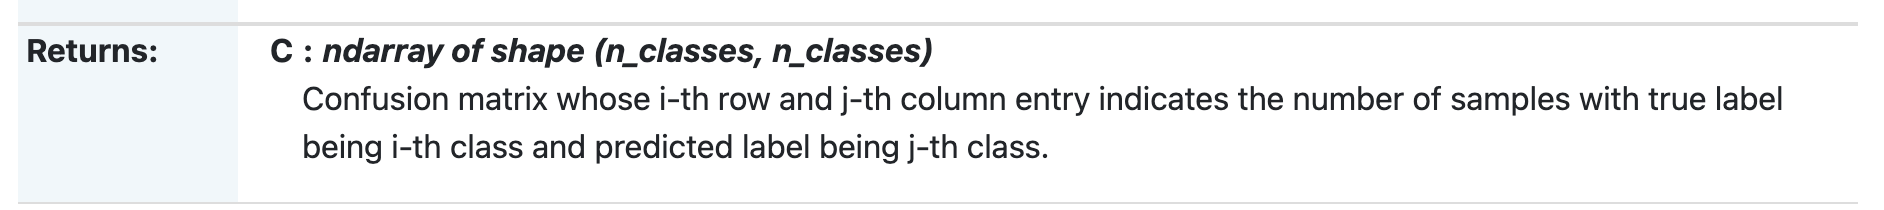

But the `ConfusionMatrixDisplay` plotting functionality in sklearn makes this easy

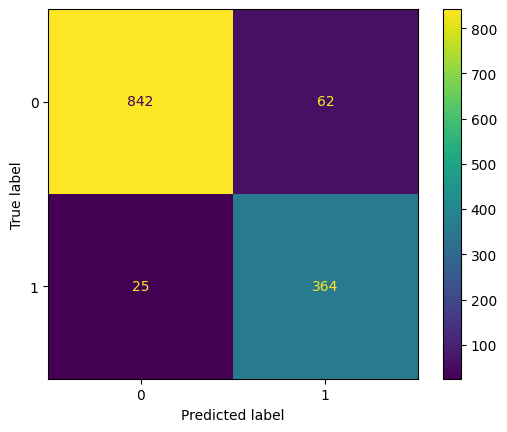

In [13]:
ConfusionMatrixDisplay(conf_matrix).plot()

<div>
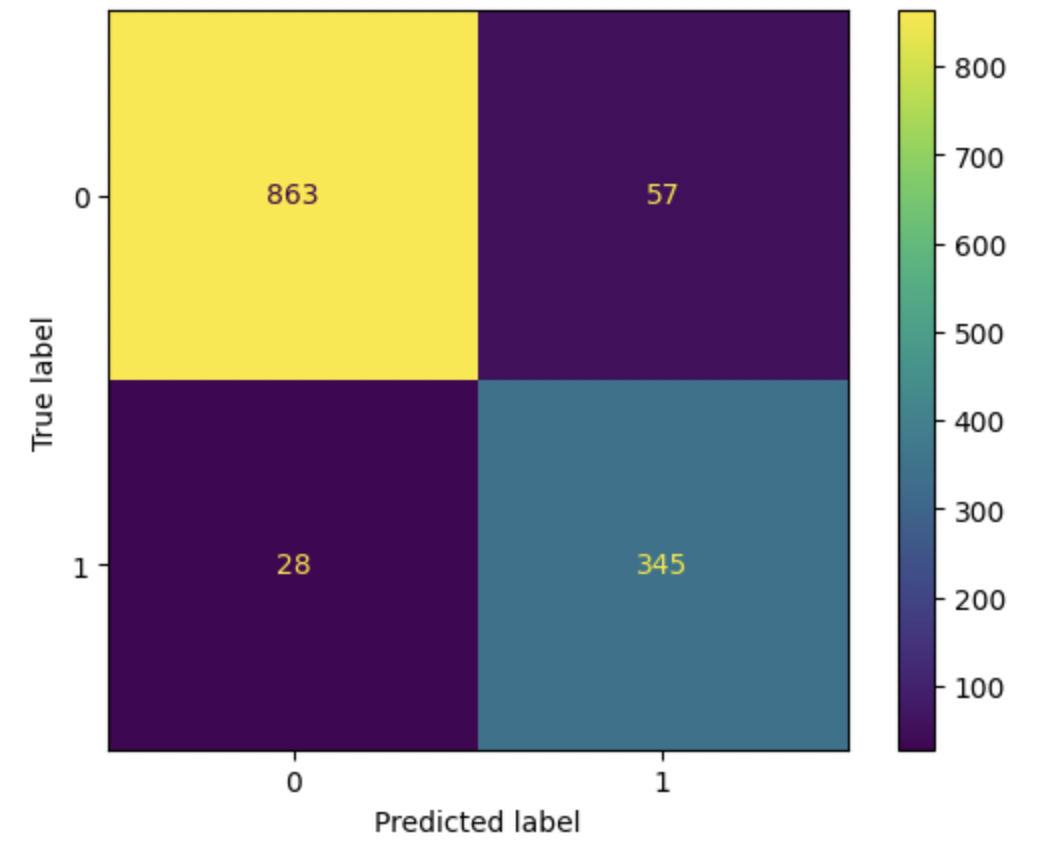
</div>

Finding Accuracy using Confusion Matrix

In [14]:
np.diag(conf_matrix).sum() / conf_matrix.sum()

0.9327146171693735

# **Precision**

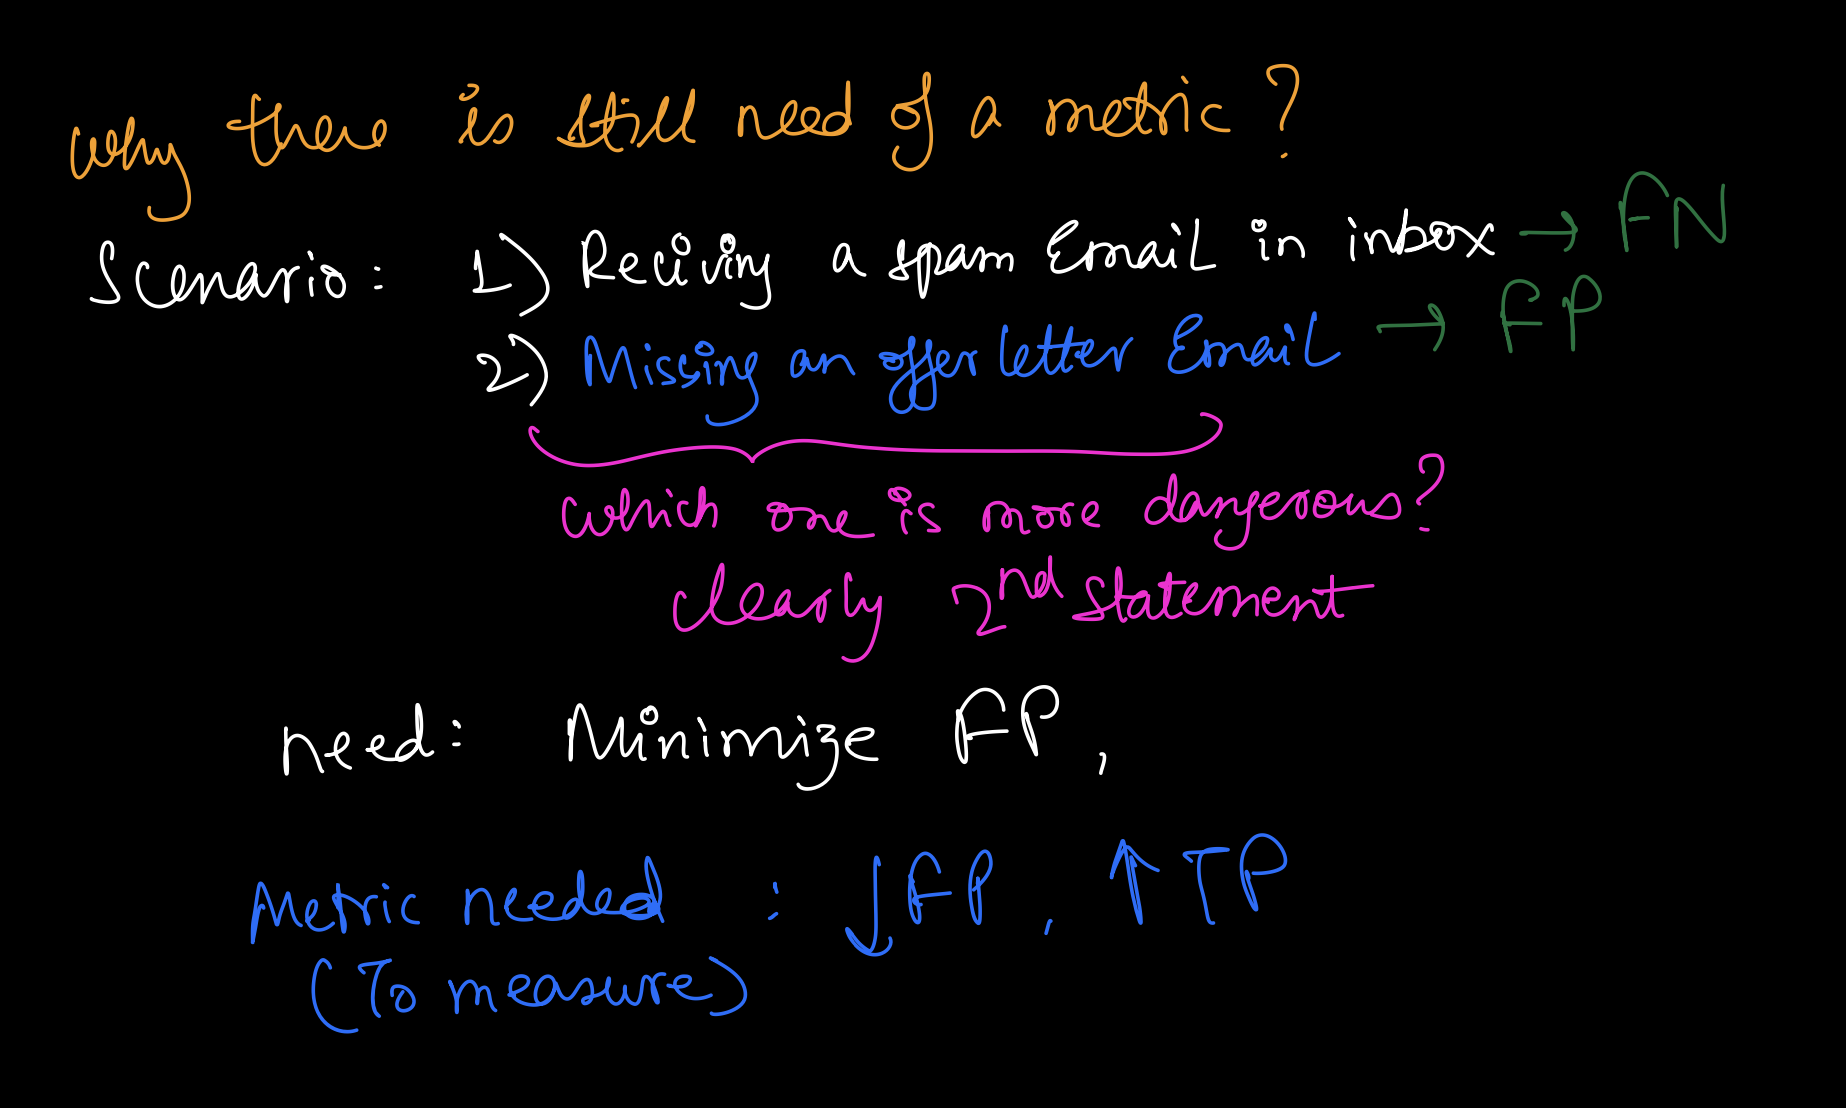

**Observe**

With confusion matrix, we still haven't resolved the accuracy metric issue!

#### What can be done with Confusion Matrix to have a metric better than Accuracy ?

Ans: To find the need of the metric lets understand with an example:

1. suppose we recieve a spam email in our primary box of gmail
2. and have an offer letter email in our spam box of gmail

<br>

#### Which amongst the two scenarios is more hazardeous ?
Ans: Clearly, the 2nd case.

#### Is **having an offer letter email in our spam box of gmail** FP or FN ?
Ans: As model predicts the email as spam (Class1) while it is a not-spam mail(Class0)
- Clearly it is a case of **FP**


Hence, **FP is dangerous** ,
- and we want to **minimize FP**
- But at the same time the model will always want to  have a higher **maximize TP**




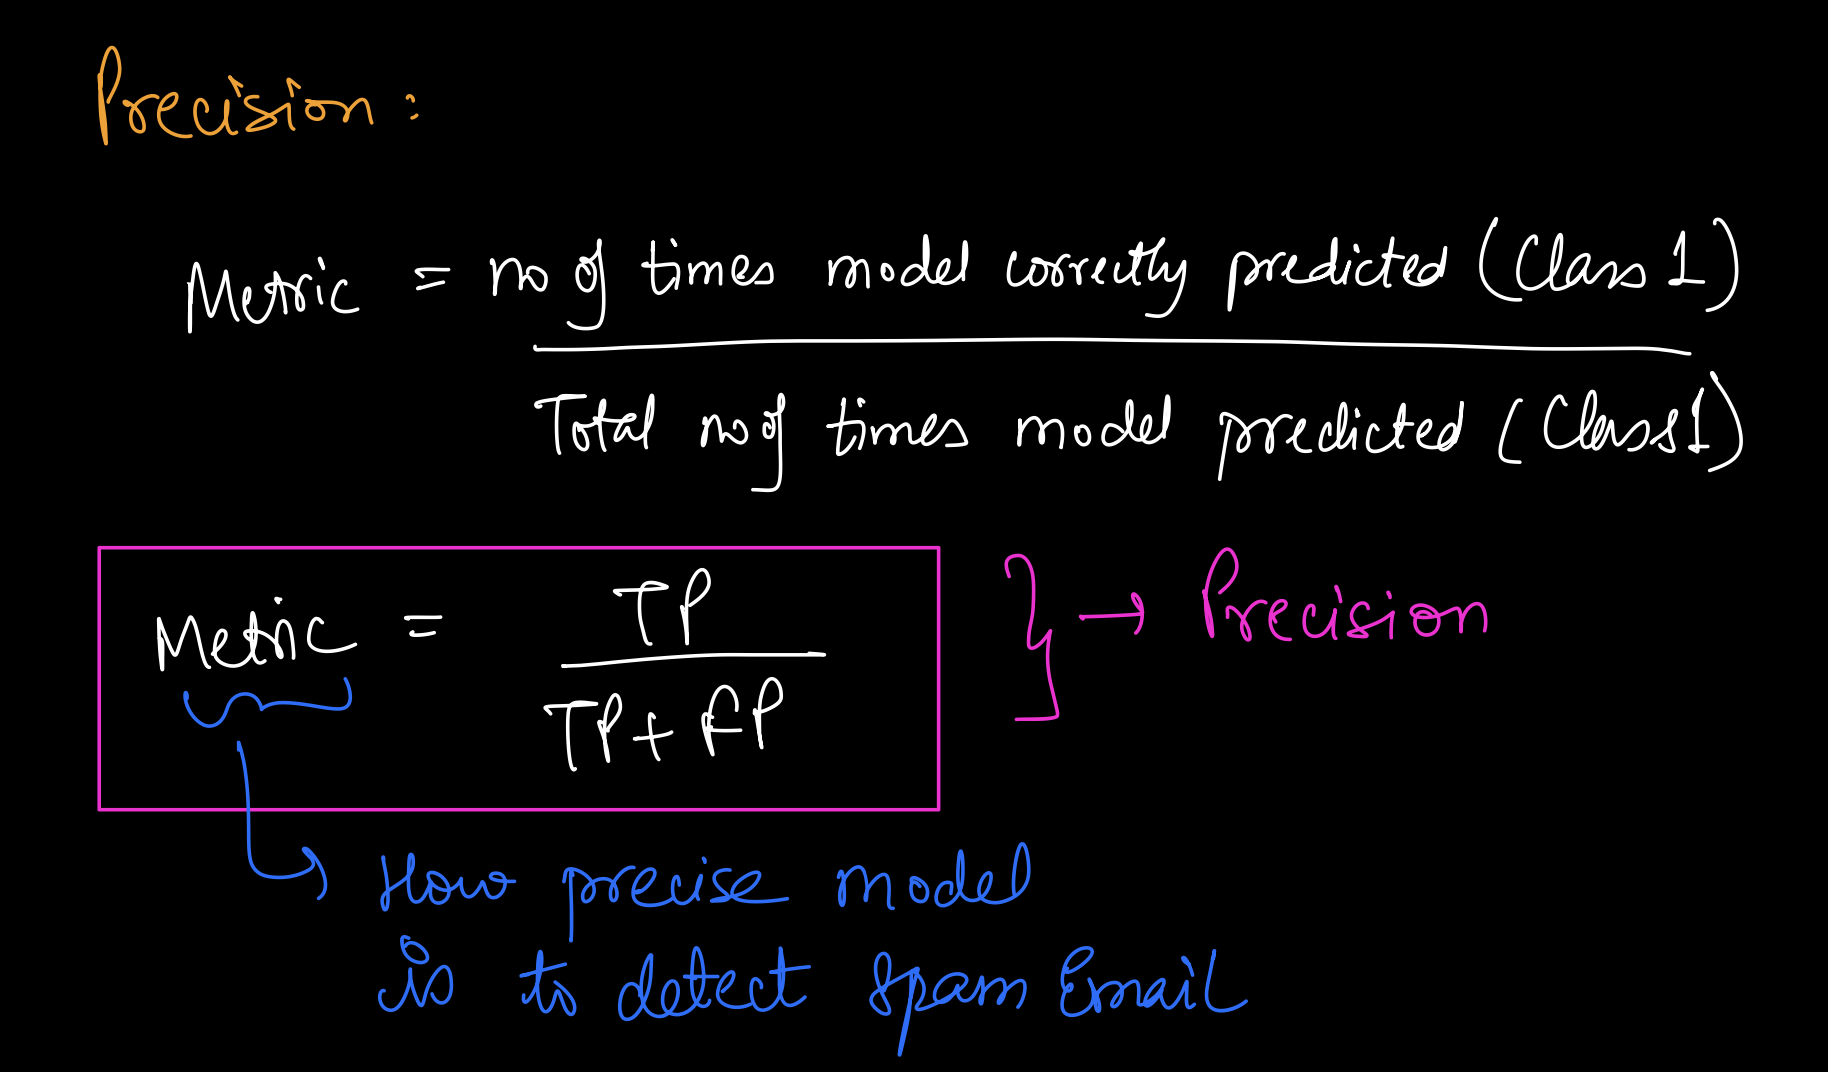

Therefore we need a metric to measure $FP$ and $TP$

Lets define:

- $ Met = \frac{no \space of \space times \space model \space correctly predicted \space Spam \space emails \space(Class 1)}{Total \space no\space  of \space times\space  model \space  predicted \space Spam \space email (Class1)} $

Now if we talk in terms of $TP$ and $FP$:

- $Met = \frac{TP}{TP+FP}$

<br>

**Note:** This metric is known as Precision

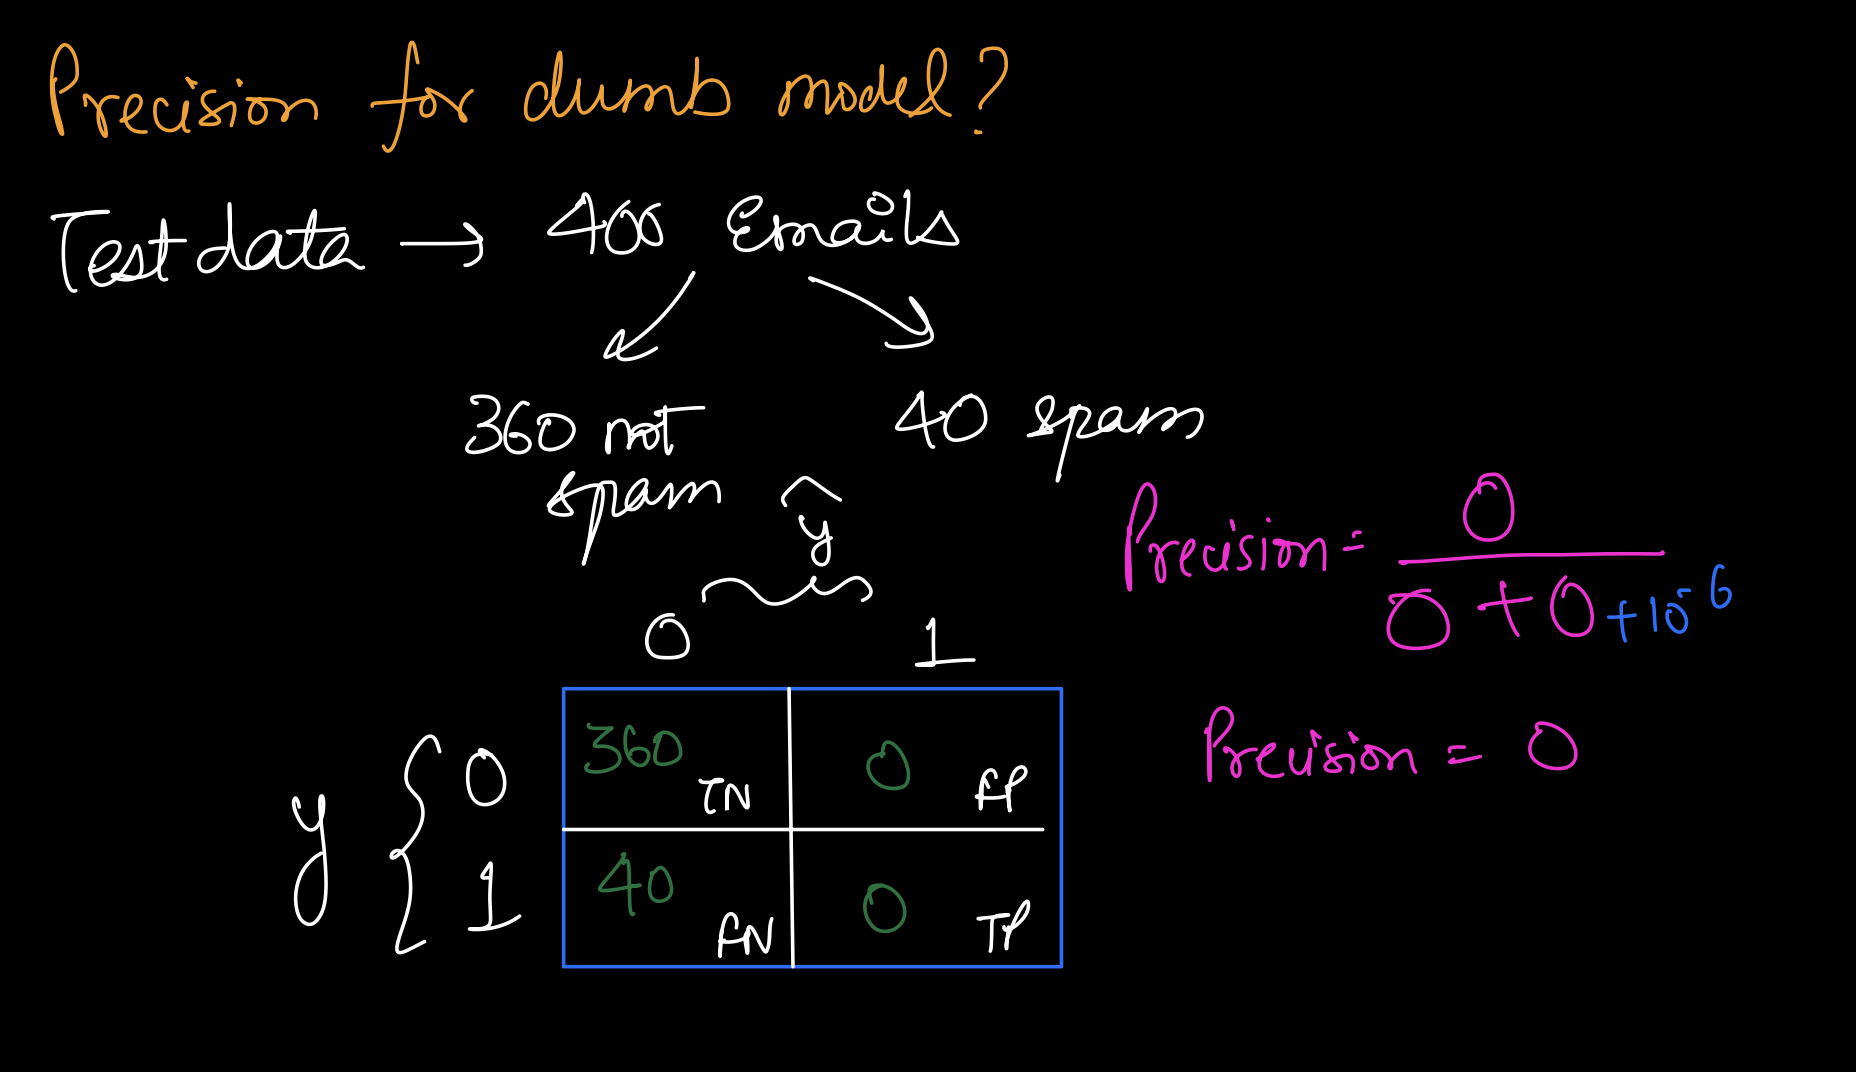

if test data has 100 samples, such that:
- 45 is spam
- 55 is not spam

<br>

#### What will be the precision for a dumb model ?

Ans: As dumb model always predicts not-spam (class0):
- Its $TP =0$ and $FP = 0$ , hence $Precision = \frac{TP}{TP+FP} =  \frac{0}{0}$

**observe**

Causes a math error

#### What can be done to avoid math error in precision ?
Ans: add a small value $ 10^{-6}$ to denominator


<br>


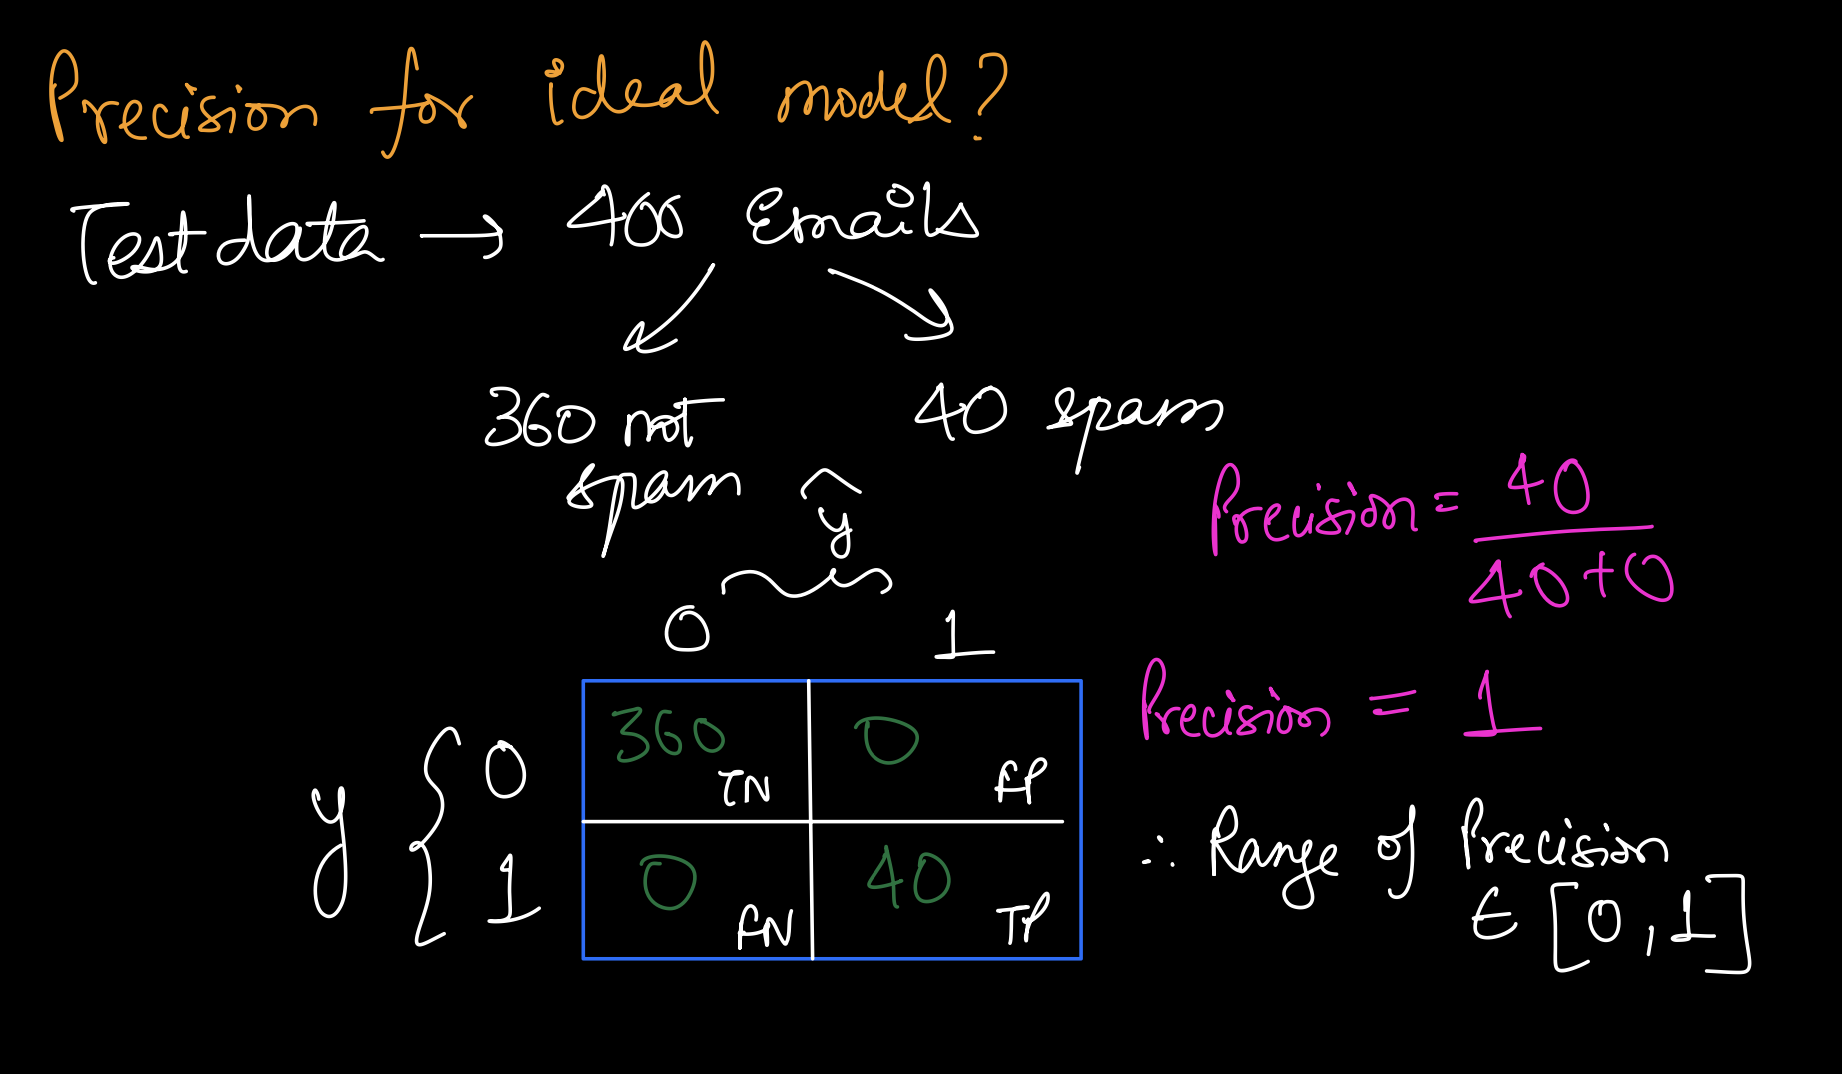


#### What will be the precision for an ideal model ?

Ans: As ideal model always predicts correctly:
- Its $TP = 45 $ and $FP = 0$, hence $Precision = \frac{TP}{TP+FP} =  \frac{45}{45+0} = 1$

<br>


Hence the range of Precision:
- $Precision \in [0,1]$


# **Precision Code**

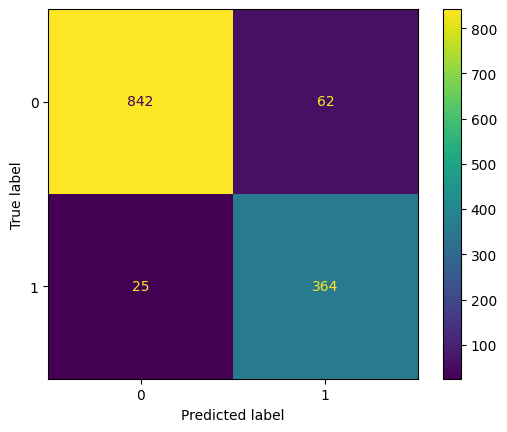

In [15]:
ConfusionMatrixDisplay(conf_matrix).plot()

Scratch Implementation

In [16]:
def precision_calc(conf):
  tp = conf[1,1]
  fp = conf[0,1]

  return tp/(tp+fp)

In [17]:
precision_calc(conf_matrix)

0.8544600938967136

Using Sklearn's precision Score

In [18]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

0.8544600938967136

**observe**

Even though the model has a lower precision value than accuracy:
- Its still a great model because of its high precision value

## **Recall**

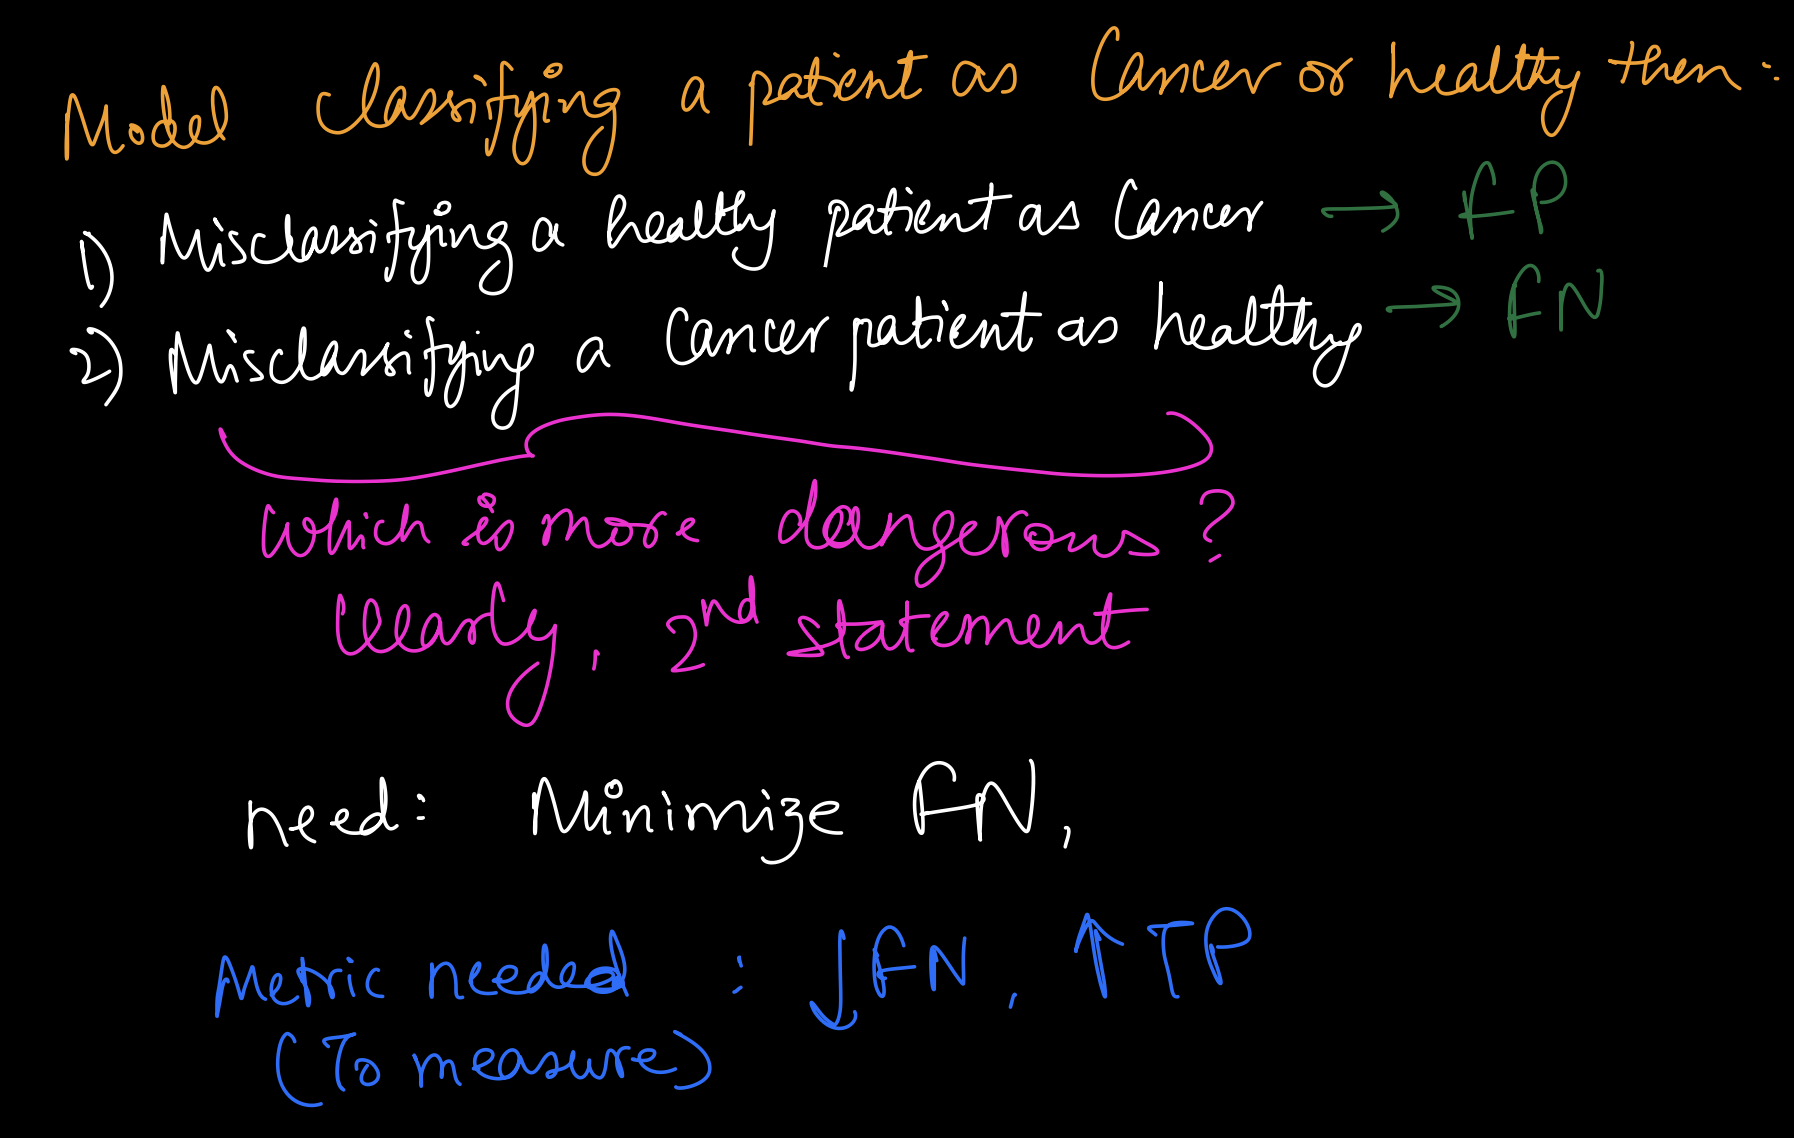

Now imagine if there is a model that classifies **Cancer and Non-Cancer** patients

#### What do you think will be the positive (class 1) and negative class (class 0) ?
Ans: Ideally, the classes should be:
1. Class 1 → Cancer
2. Class 0 → Non- Cancer

<br>

if model misclassifies in the data such that:

1. a healthy patient is considered as Cancer
2. a Cancer patient is considered as Healthy


#### Which among the two is more dangerous ?

ans: Clearly, the 2nd case as:
- to **declare a cancerous patient healthy can lead to the person's death**
- While to **declare a healthy patient cancerous** can be **rectified** as the procedure proceeds

<br>

#### is a Cancer patient is considered as Healthy an FP or FN ?
Ans: As model misclassifies cancer patient to healthy:
- it is definetly FN

**Note**

We want $FN$ to decrease and $TP$ to increase.

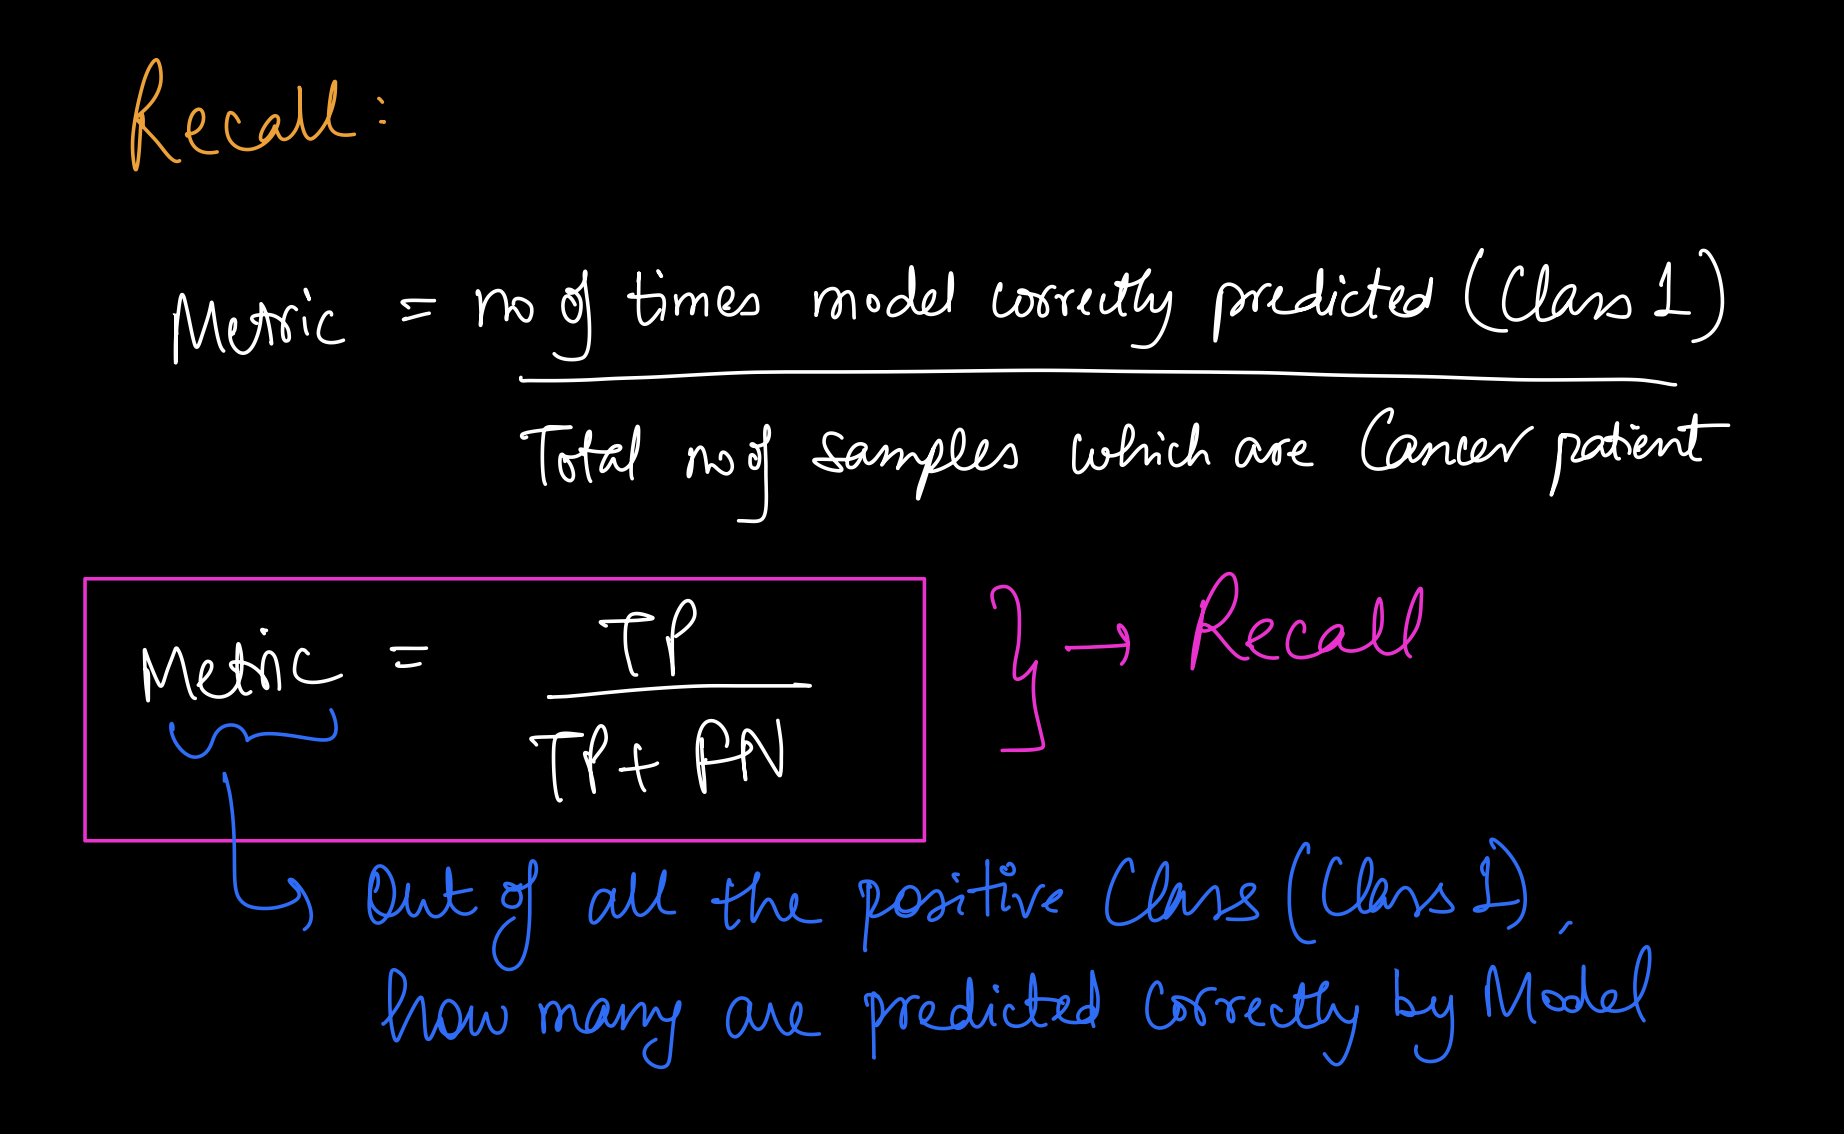

Hence we need a metric to measure $FN$ and $TP$

Lets define:

- $ Met = \frac{no \space of \space times \space model \space correctly predicted \space Cancer \space patients \space(Class 1)}{Total \space no\space  of \space actual \space  Cancer \space  patients (Class1)} $

Now if we talk in terms of $TP$ and $FN$:

- $Met = \frac{TP}{TP+FN}$

<br>

**Note:** This metric is known as Recall
- It tells **out of all the positive class** data, how many are **predicted correctly by the model**

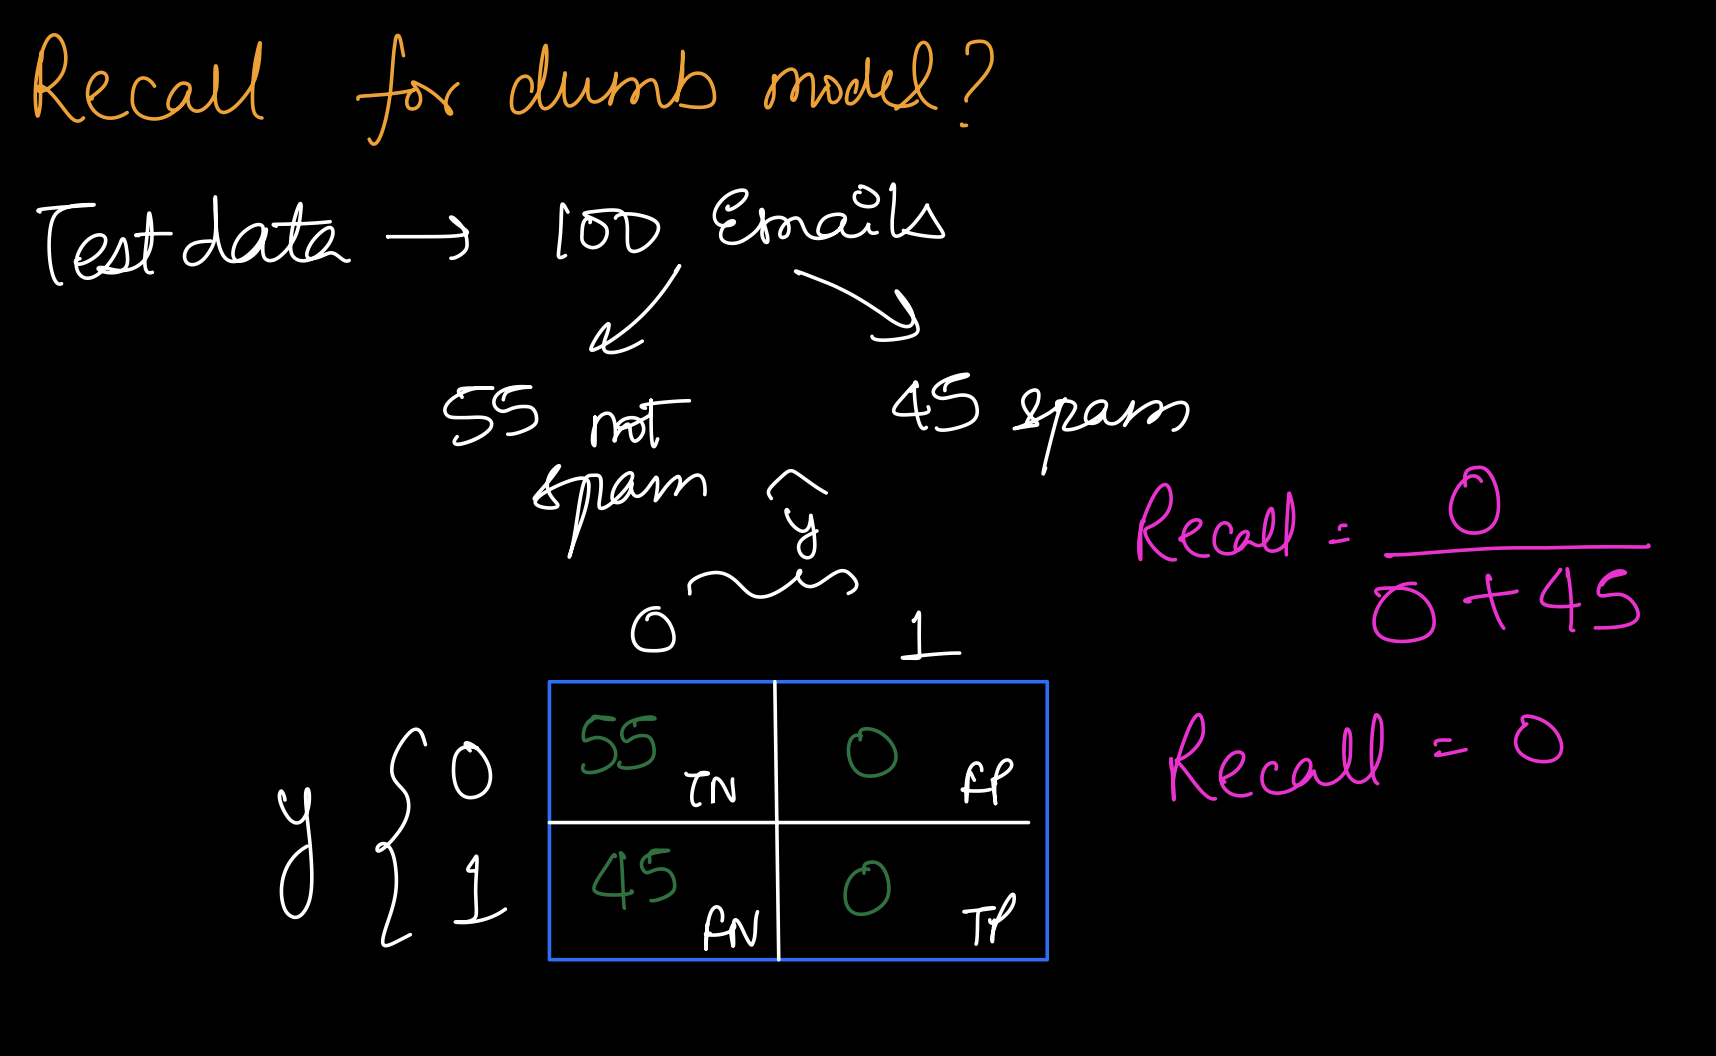

if test data has 100 samples, such that:
- 45 is spam
- 55 is not spam

<br>

#### What will be the recall for a dumb model ?

Ans: As dumb model always predicts not-spam (class0):
- Its $TP =0$ and $FN = 45$ , hence $Recall = \frac{TP}{TP+FN} =  \frac{0}{0+45} = 0$




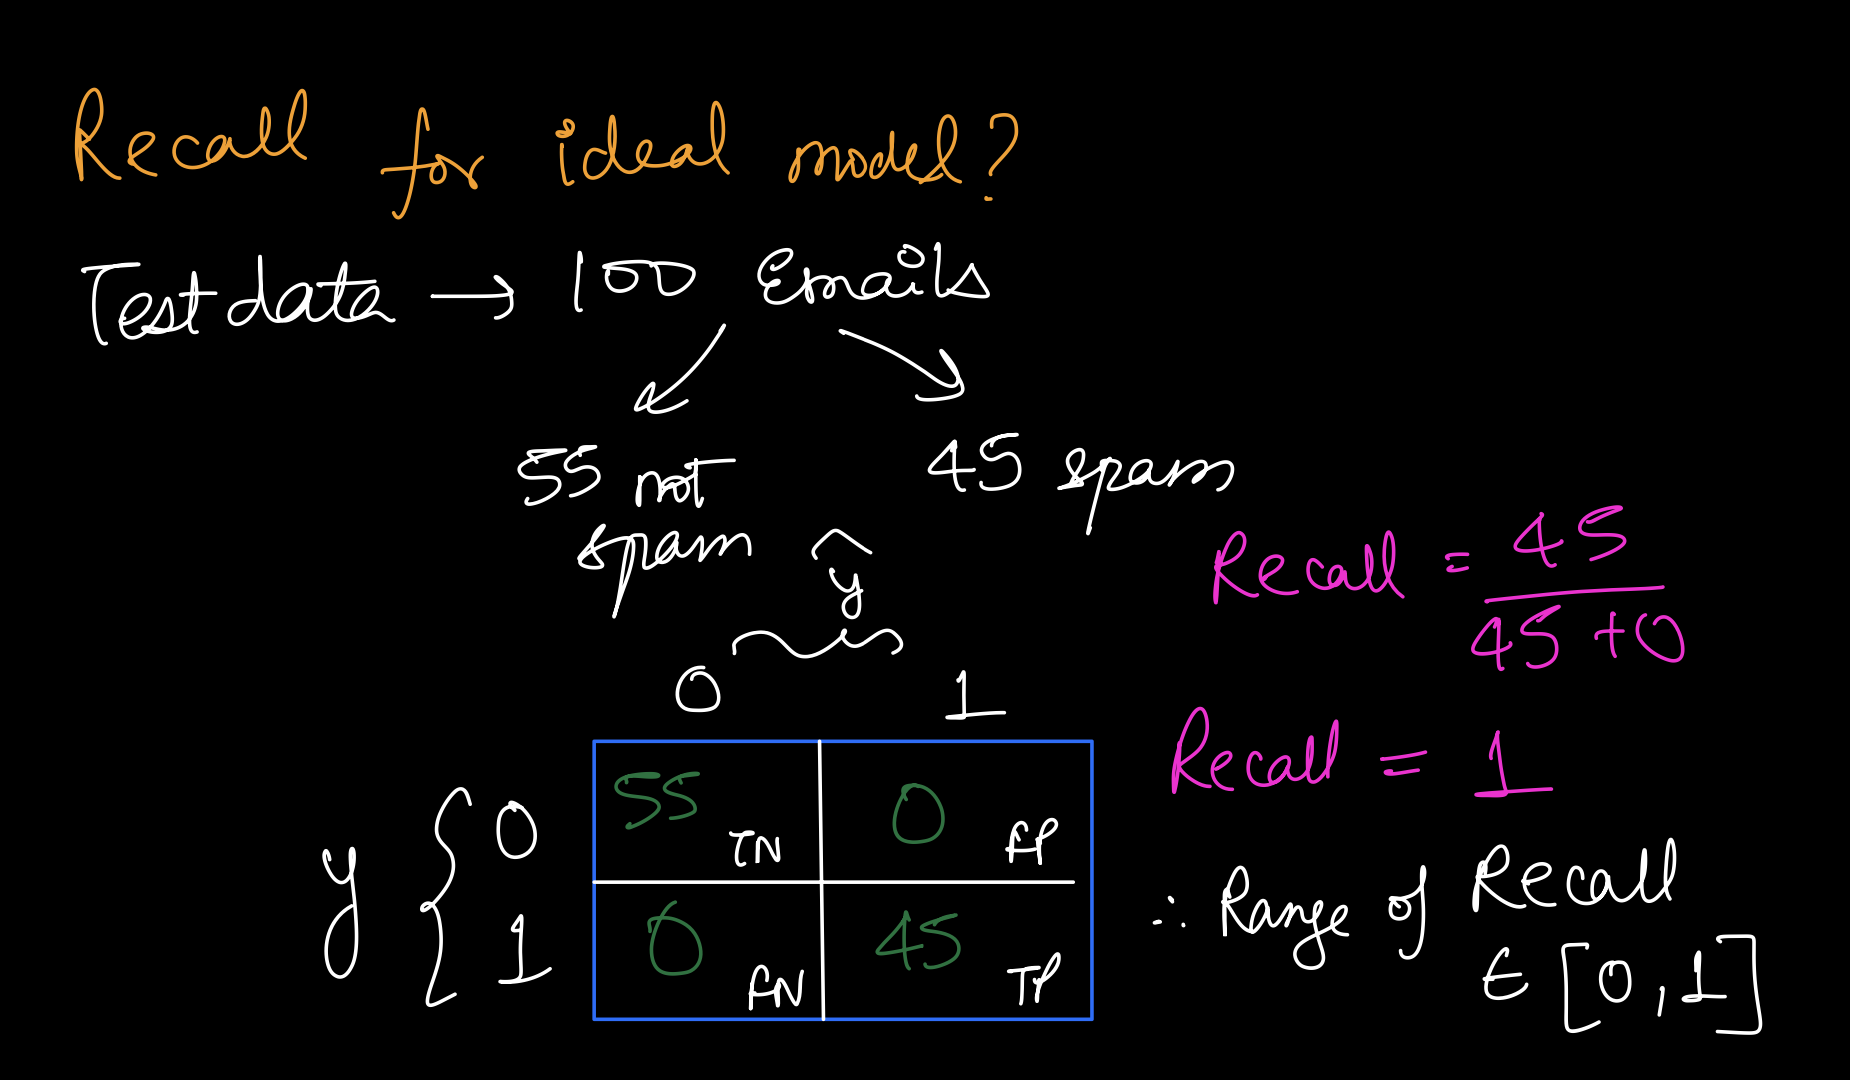



<br>

#### What will be the recall for an ideal model ?

Ans: As ideal model always predicts correctly:
- Its $TP = 45 $ and $FN = 0$, hence $Recall = \frac{TP}{TP+FN} =  \frac{45}{45+0} = 1$

<br>


Hence the range of Recall:
- $Recall \in [0,1]$


# **Recall Code**

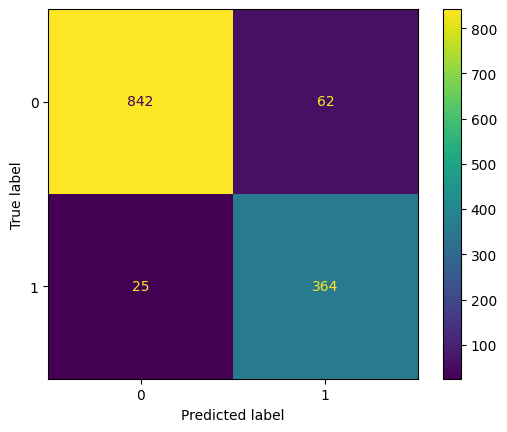

In [19]:
ConfusionMatrixDisplay(conf_matrix).plot()

Scratch Implementation

In [21]:
def recall_calc(conf):
  tp = conf[1,1]
  fn = conf[1,0]

  return tp/(tp+fn)

In [22]:
recall_calc(conf_matrix)

0.9357326478149101

Using Sklearn's precision Score

In [23]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

0.9357326478149101

**observe**

The model's recall value is almost very close to accuracy :
- It shows the  model has very low FN

# **Hack to remember Precision and Recall !**

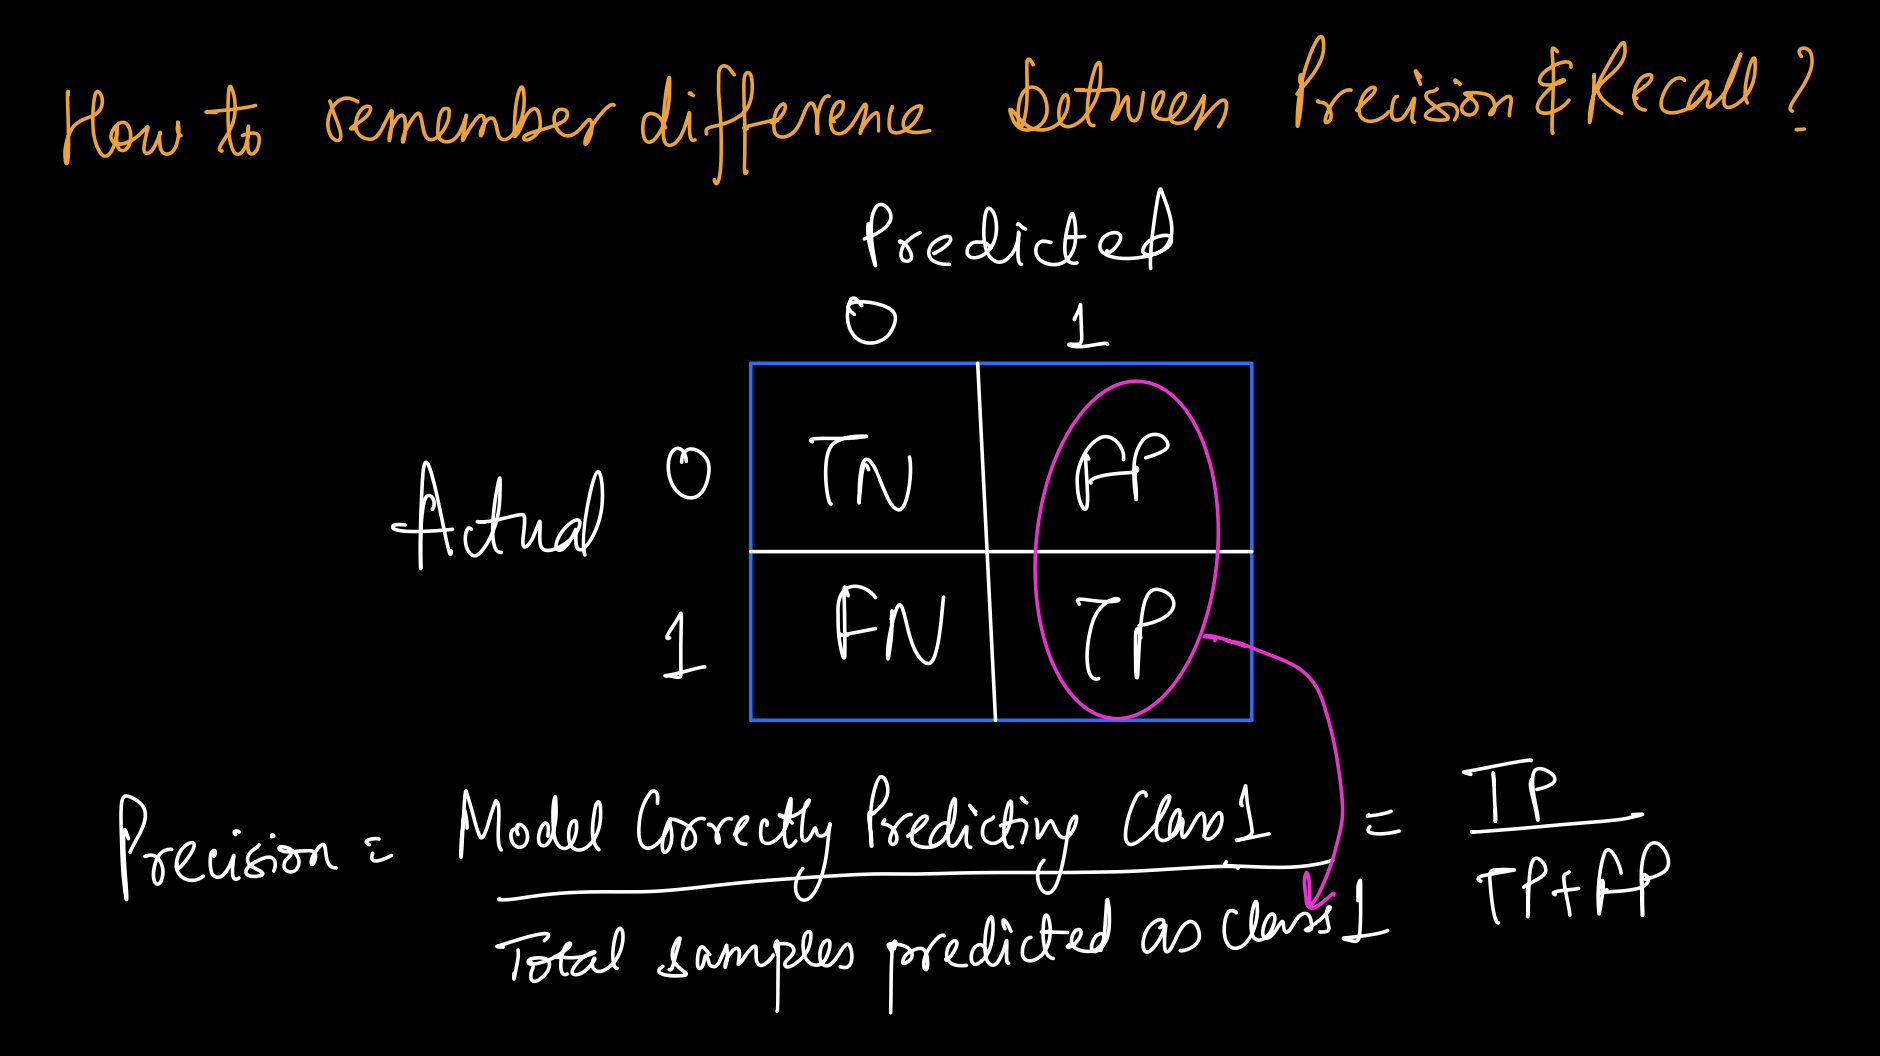

#### What is the best way to remember the difference between Precision and Recall ?

ans: Remember Confusion matrix is:

||0|1|
|:--|:--|:--|
|0|TN|FP|
|1|FN|TP|

<br>

and Precision is defined as:

- Precision $ = \frac{no \space of \space times \space model \space correctly predicted \space (Class 1)}{Total \space no\space  of \space times\space  model \space  predicted \space (Class1)} =  \frac{TP}{TP+FP}$


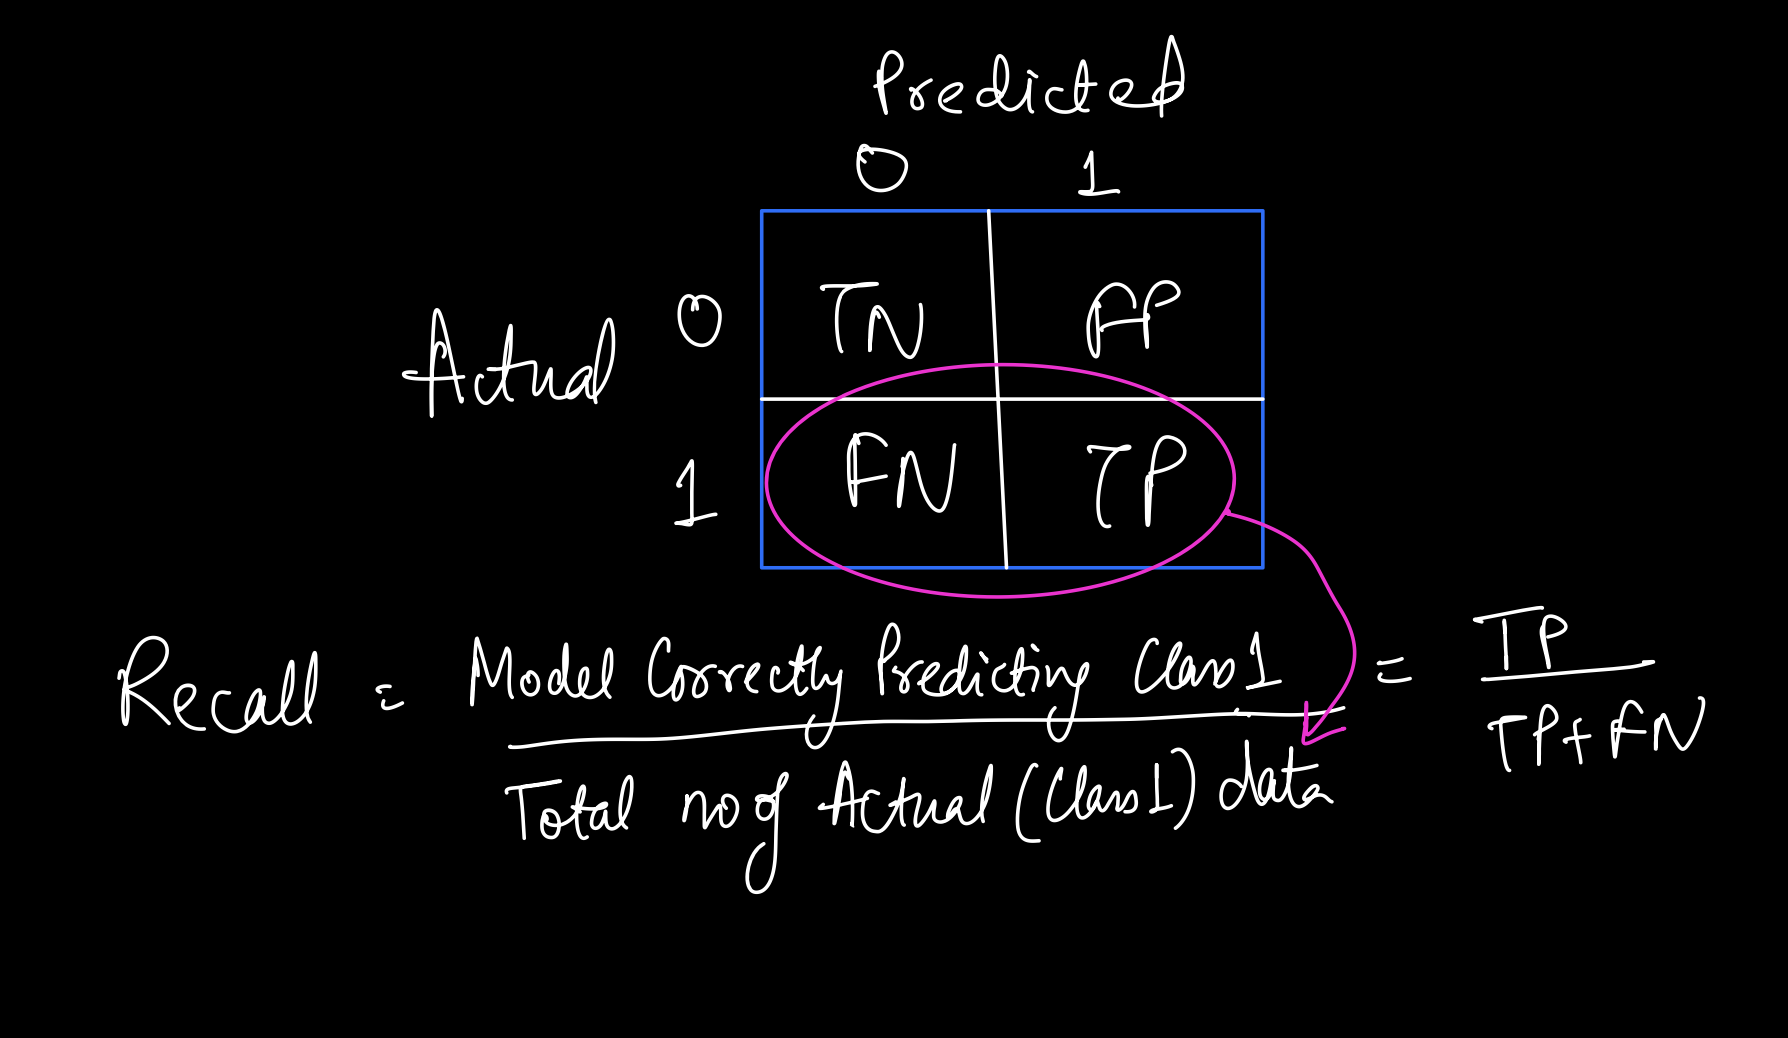


While Recall is defined as:

- Recall $= \frac{no \space of \space times \space model \space correctly predicted \space(Class 1)}{Total \space no\space  of \space actual \space (Class1) \space data} = \frac{TP}{TP+FN}$

<br>


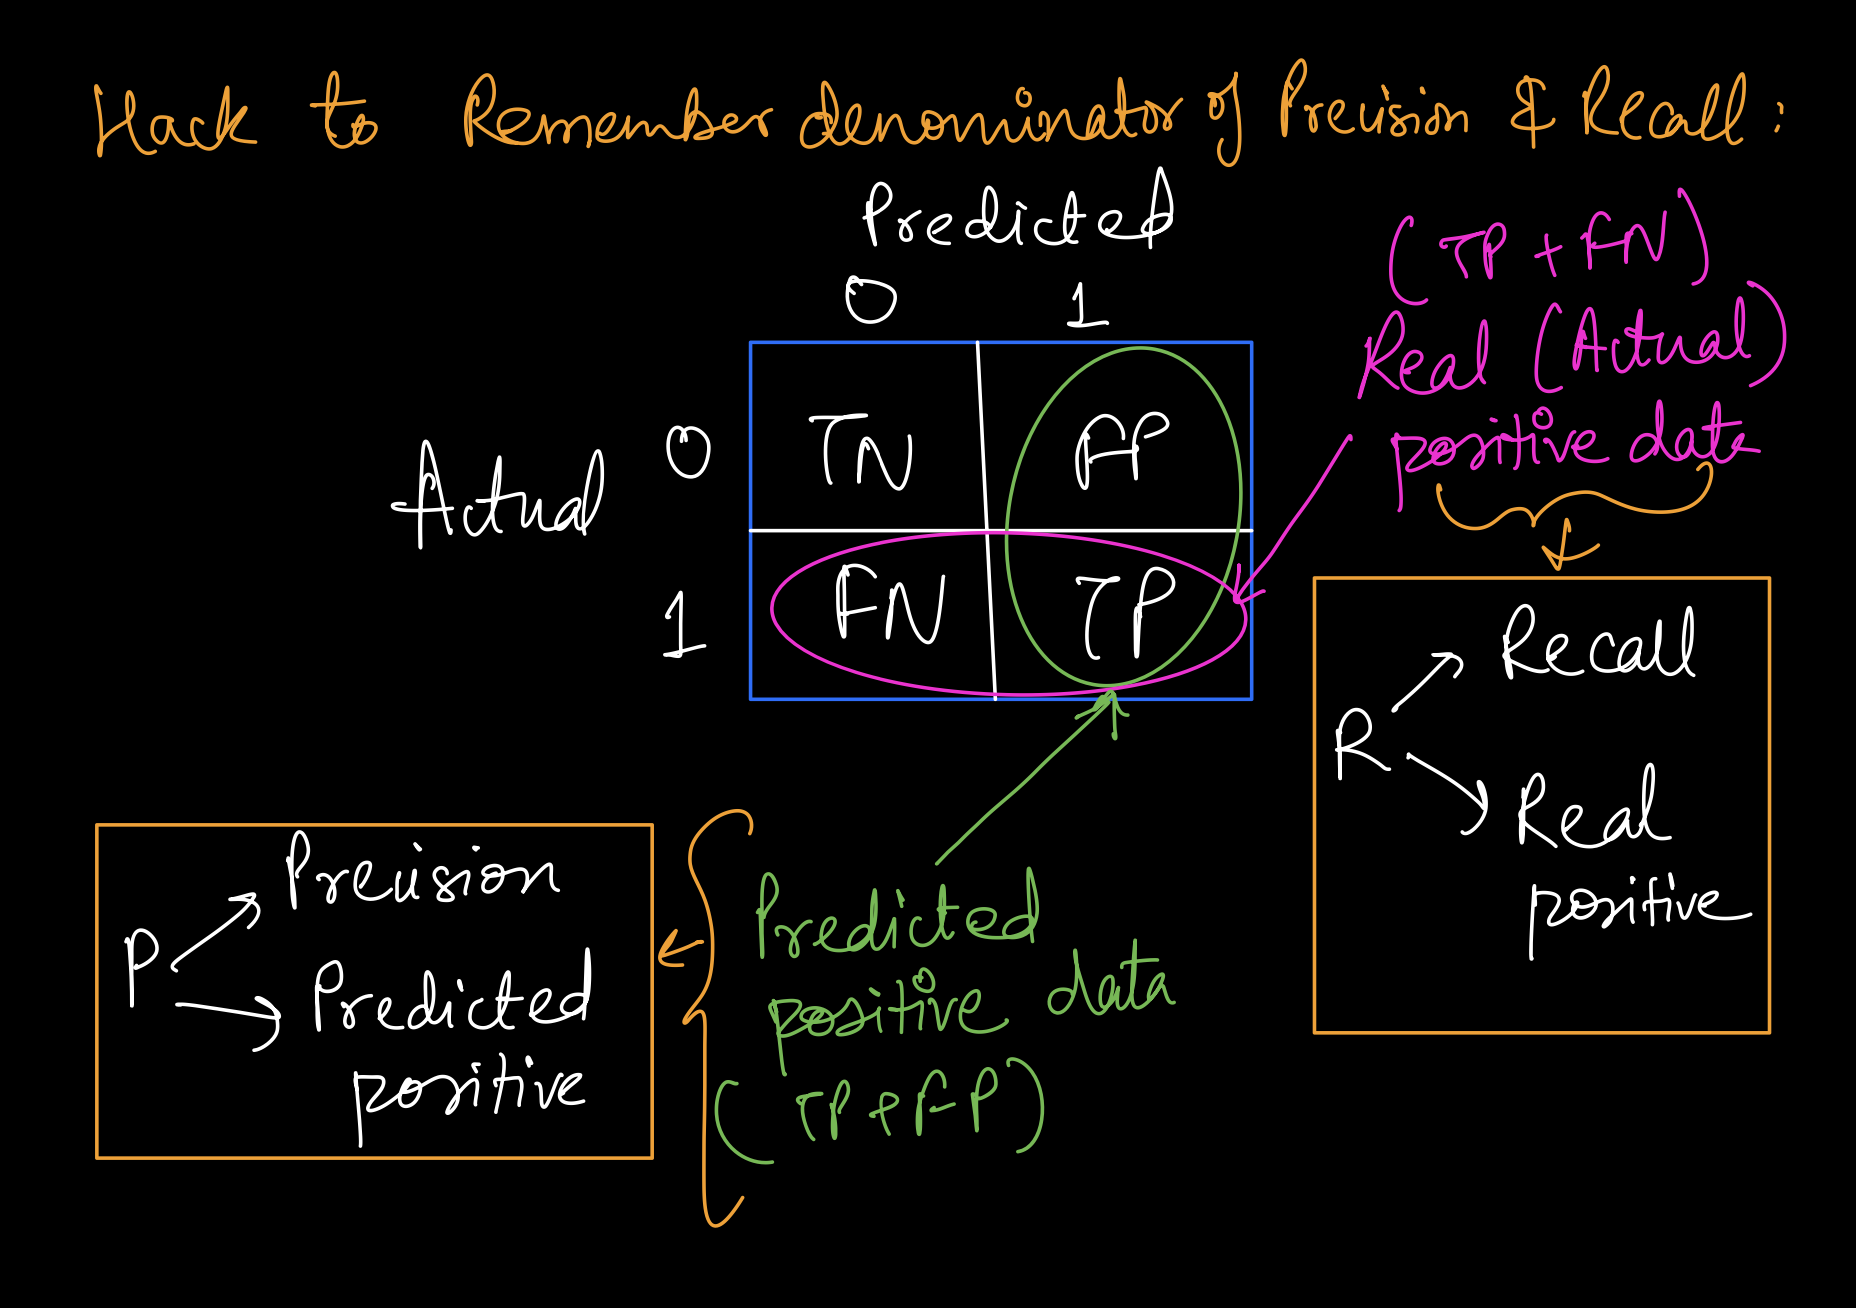


**observe**

Both in Precision and recall the numerator is **TP**, but:

1. In Precision:
 - We take **Predicted positive Class(class1) data** in denominator (TP+FP = model predicting as class 1)


<br>

2. While in Recall:
 - We take **Real(actual) positive Class(class1) data** in denominator (TP+FN = actual class 1 data)


**Hack to remember denominator:**

- **P for Precision, P for Predicted positive**(TP+FP)

- **R for Recall, R for Real Positive**(TP+FN)



## **F1 score**

#### Can both FN and FP be important for a real world problem ?



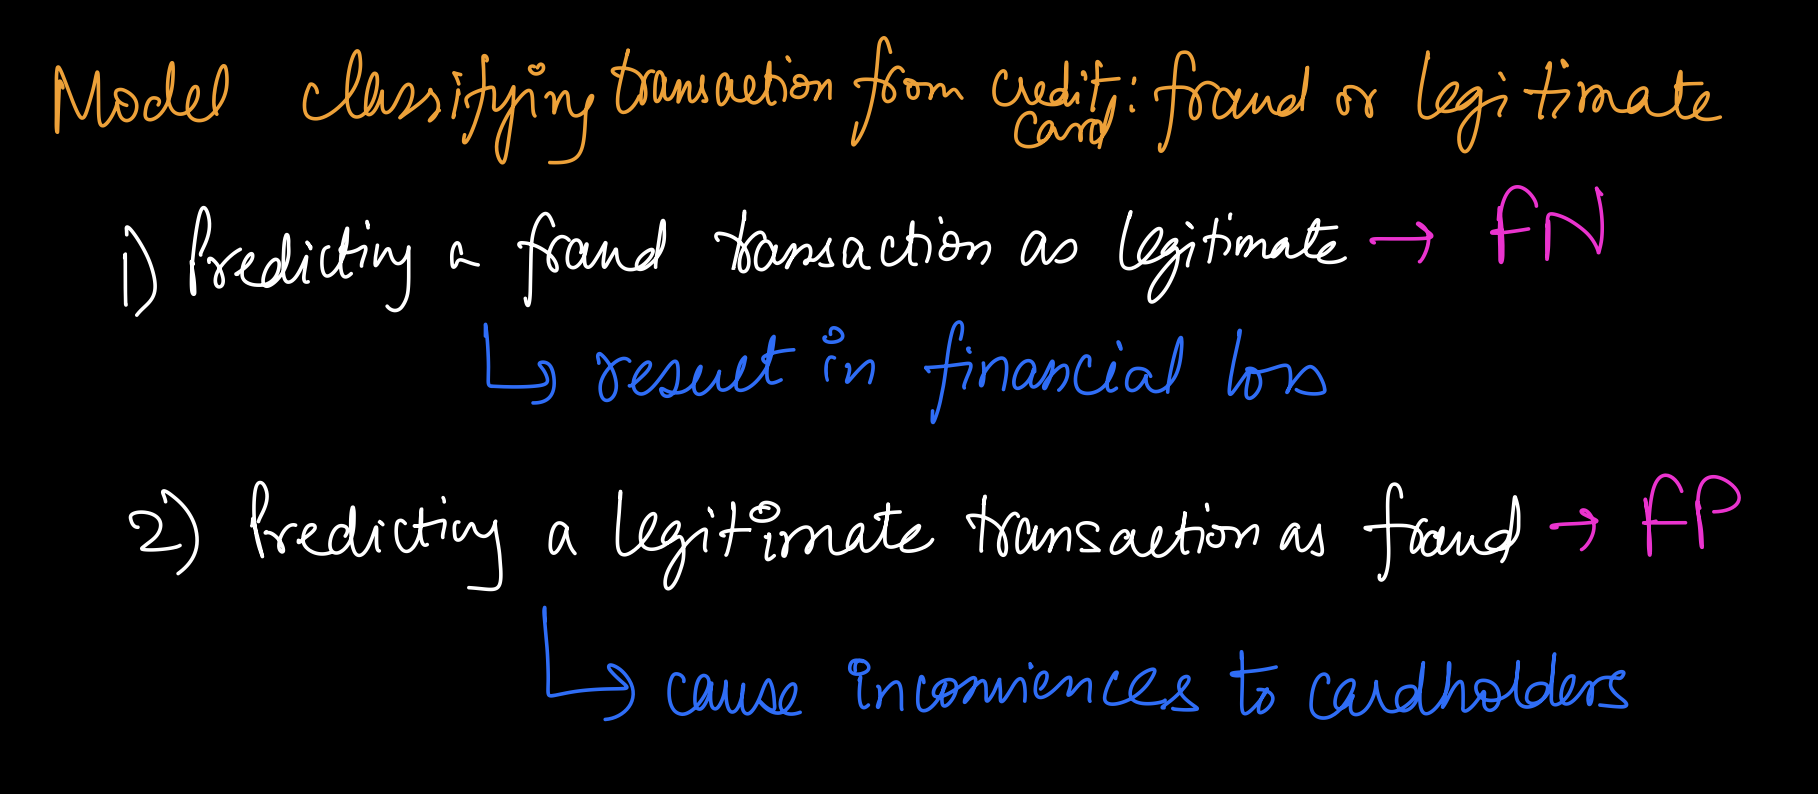

ans: Yes, lets take an example:


Imagine a model is used to classify credit card transactions as either fraudulent or legitimate.

1.**predicting a transaction as legitimate when it is actually fraudulent** → False Negative (FN) is important as:
- can result in financial losses for the individual or the financial institution,
- as fraudulent transactions may go undetected

<br>


2. **predicting a transaction as fraudulent when it is actually legitimate** → False Positive(FP) is also important as:
- can cause inconvenience to the cardholder,
- potentially leading to declined legitimate transactions



As FN and Fp are both important, we train three different models such that:

1. M1 has precision  = 0.3 and recall = 0.8
2. M2 has precision  = 0.2 and recall = 0.9
3. M3 has precision  = 0.7 and recall = 0.4



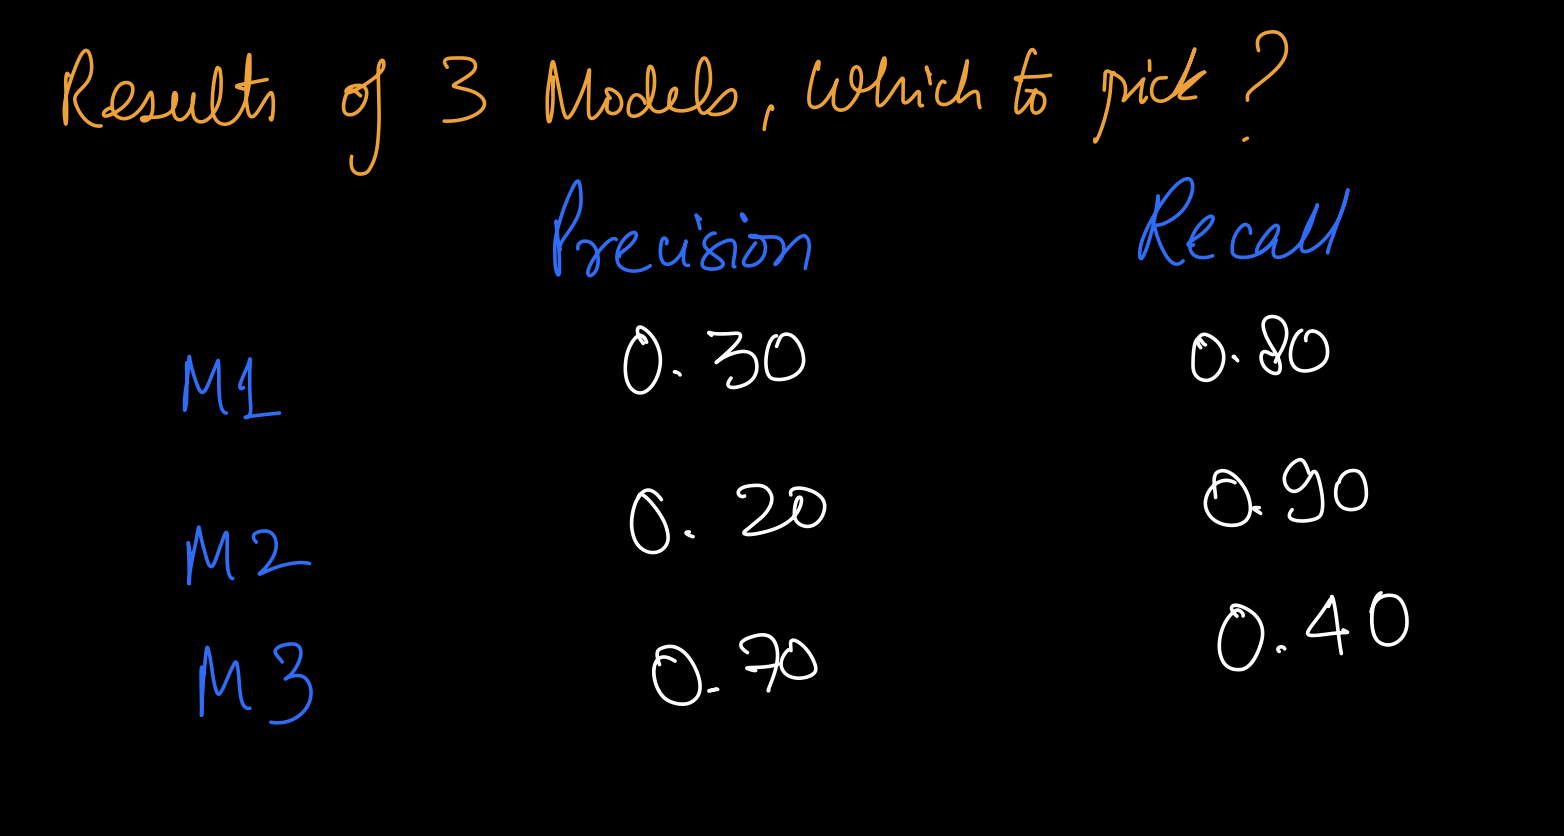

#### Which model among M1,M2,M3 is the best ?

Ans: Based on Precision:
- M3 is the best model

And based on Recall
- M2 is the best model

<br>

Hence need a way to combine Precision and Recall




#### Will simple arthematic mean (simple avg.) work ?


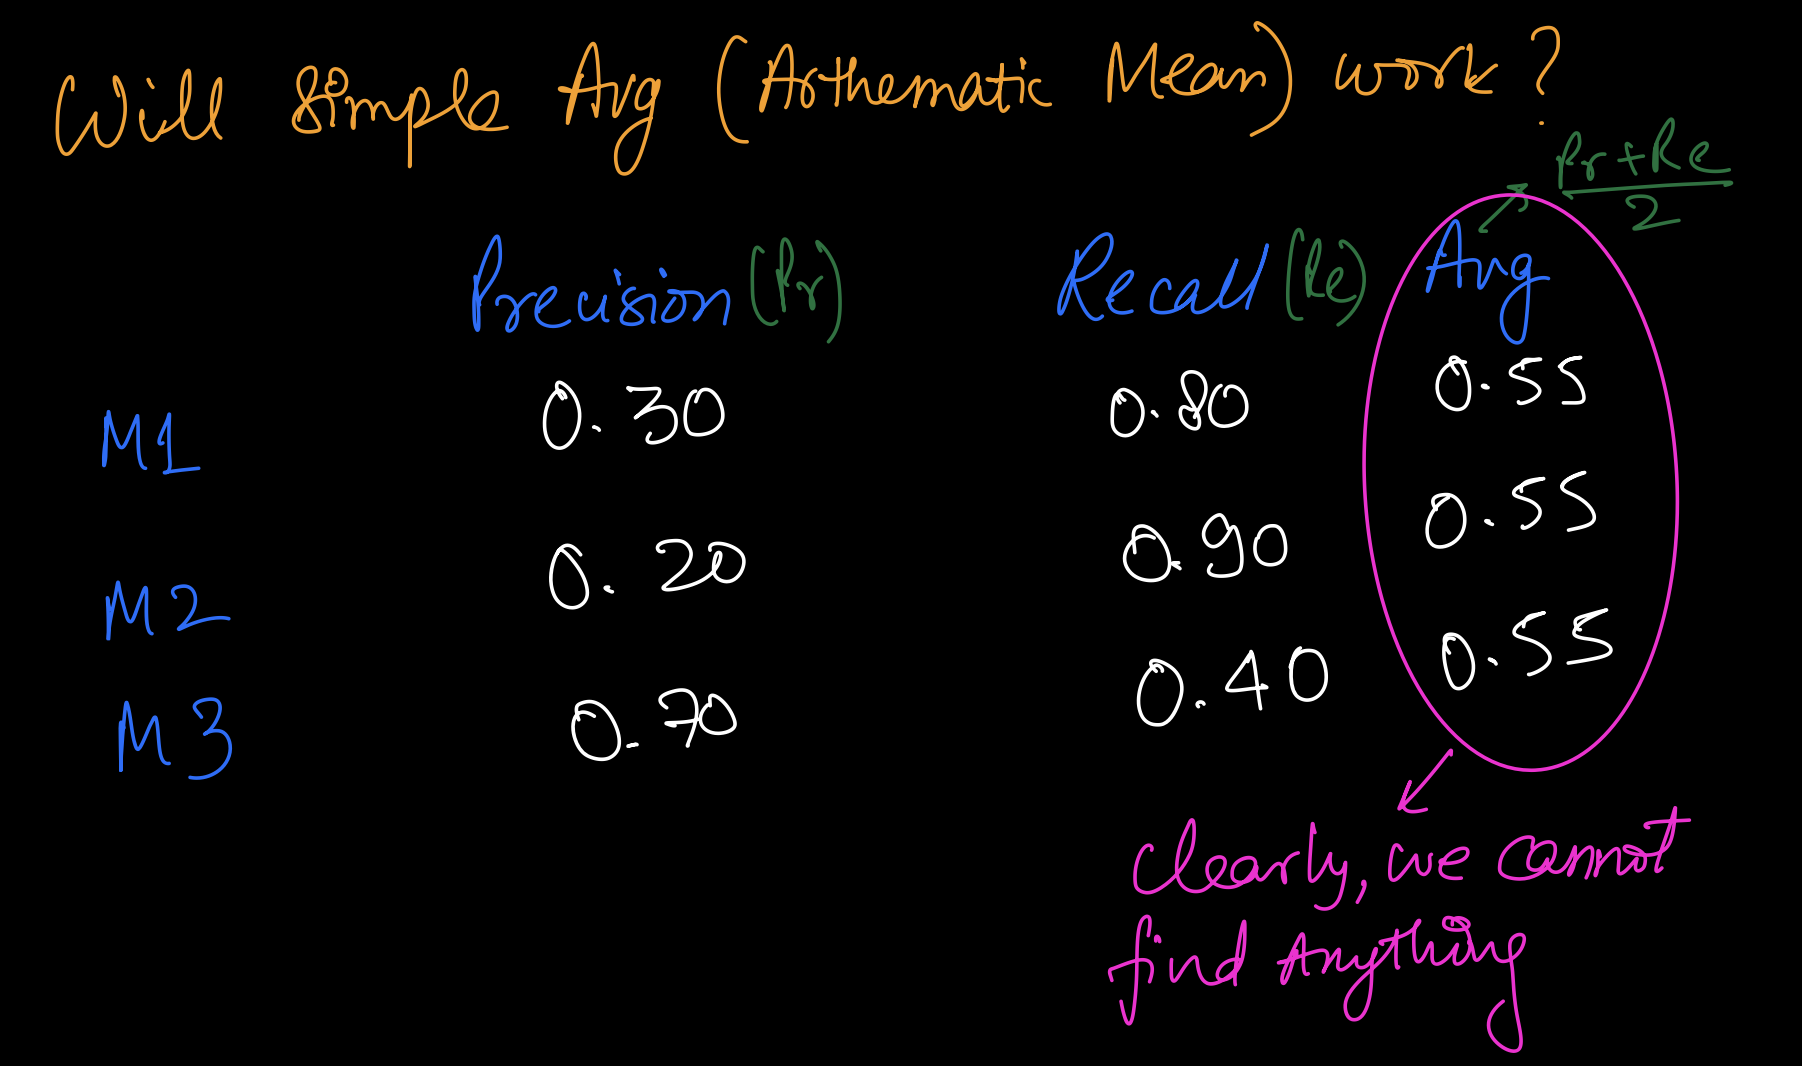

Ans: no, because the arthemetic mean becomes:

-  M1 $= \frac{0.3+0.8}{2} = 0.55 $
-  M2 $ = \frac{0.2+0.9}{2} = 0.55 $
-  M3 $ = \frac{0.7+0.4}{2} = 0.55 $

<br>

This again brings us to the square one
- as we still cant say which model is better


#### What if we use **Harmonic mean** ?

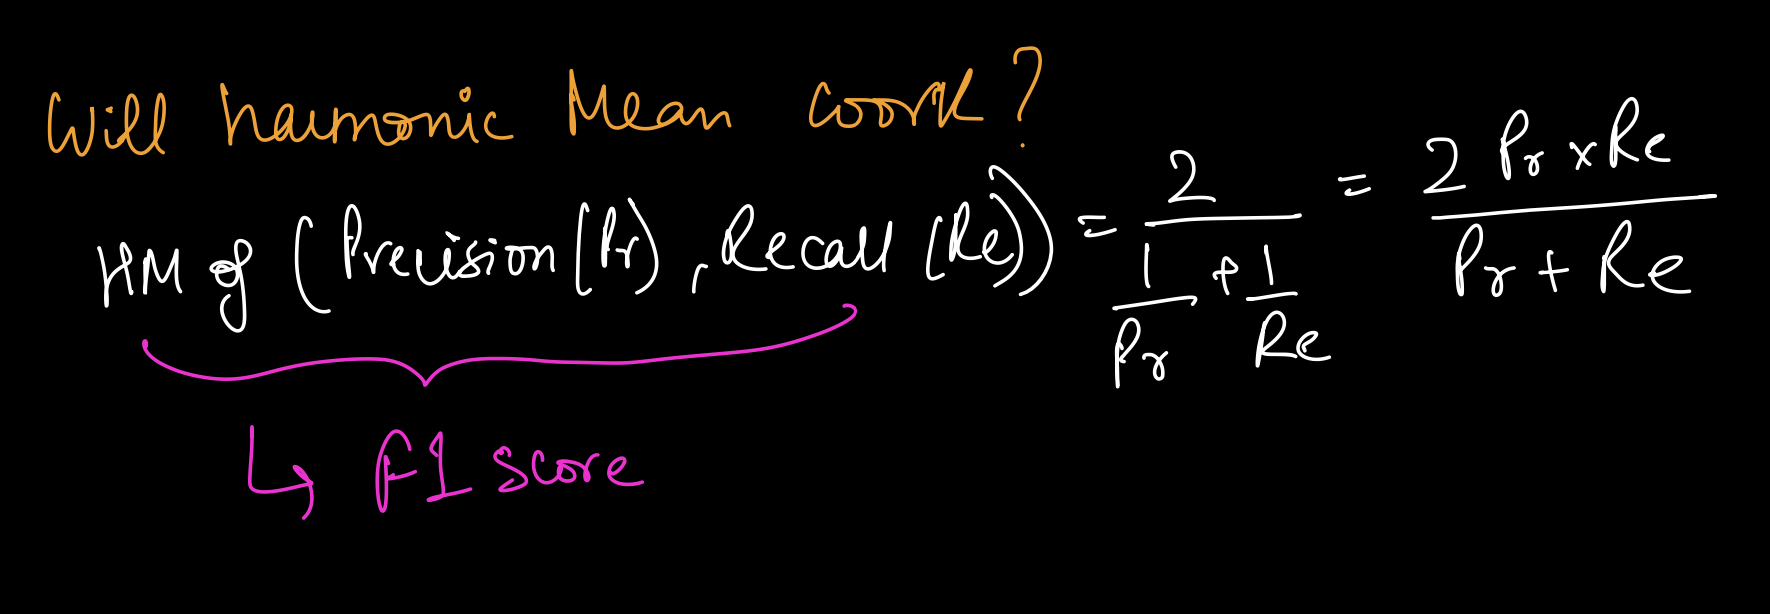

Harmonic Mean $  [Precision(Pr), Recall (Re)] =\frac{2}{\frac{1}{Pr}+\frac{1}{Re}} $

Which on solving becomes:
- Harmonic Mean $  = 2 \times \frac{Pr \times Re}{Pr+Re} $

<br>

**Note:** this harmonic mean of Precision and Recall is called **F1-Score**

# **Understanding F1-Score**

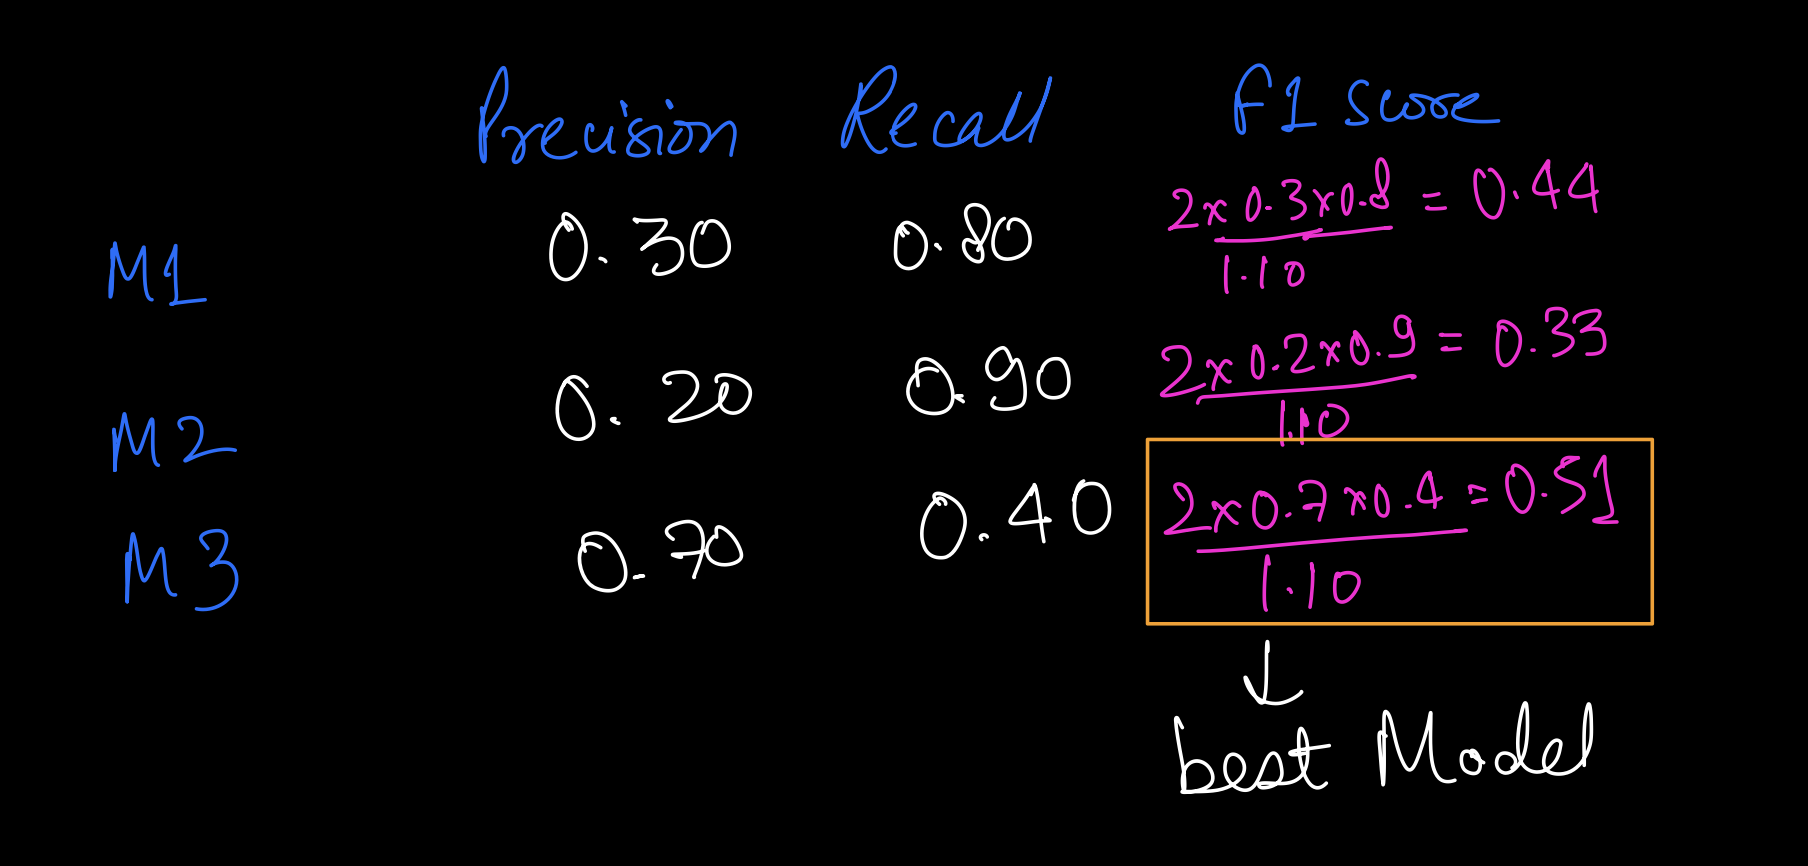

1. M1 has precision  = 0.3 and recall = 0.8
2. M2 has precision  = 0.2 and recall = 0.9
3. M3 has precision  = 0.7 and recall = 0.4

#### How does F1-score finds the better model ?

Ans) The  F1Score for each model:

1. M1: F1 score$ = 2 \times \frac{0.3 \times 0.8}{1.10} = 0.44$
2. M2: F1 score$ = 2 \times \frac{0.2 \times 0.9}{1.10} = 0.33$
3. M3: F1 score$ = 2 \times \frac{0.7 \times 0.4}{1.10} = 0.51$


<br>

Clearly, M3 is the best model to pick

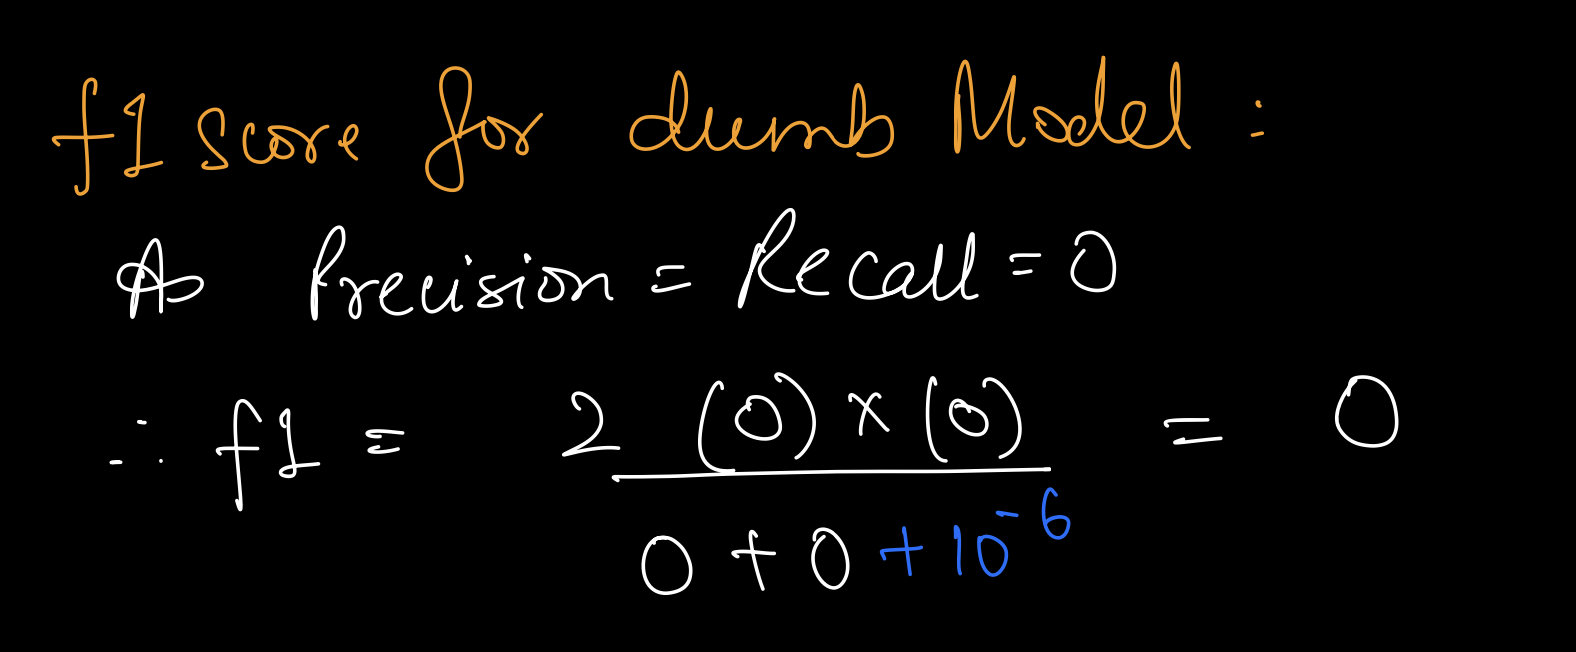

#### What will be the f1 score for dumb model?

Ans: Since for a dumb model:
- precision = recall = 0

Hence f1-score$ = 2 \times \frac{precision \times recall}{precision + recall} = \frac{0}{0}$

<br>

#### How to avoid the math error $\frac{0}{0}$ ?
ans: add a very small value $10^-6$

<br>

Hence for dumb model:
- F1score = 0


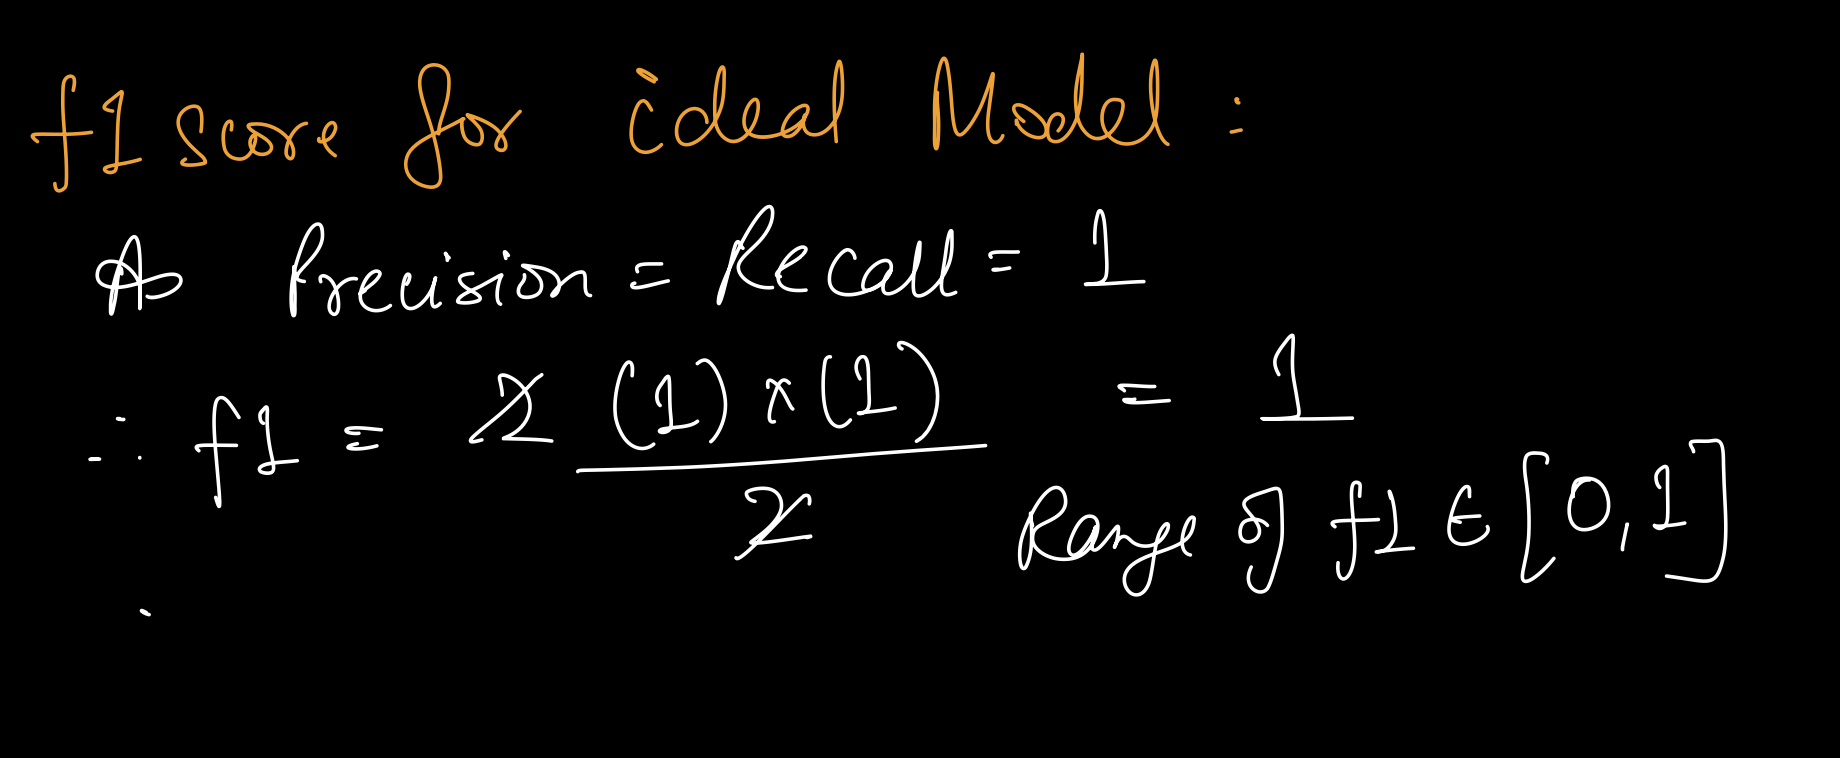

#### What will be the f1 score for ideal model?

Ans: Since for a ideal model:
- precision = recall = 1

Hence f1-score$ = 2 \times \frac{precision \times recall}{precision + recall} = \frac{2}{2} = 1$

<br>


Hence the range for F1score becomes:
- $F1score \in [0,1]$


#### Can we calculate it using sklearn as well ?

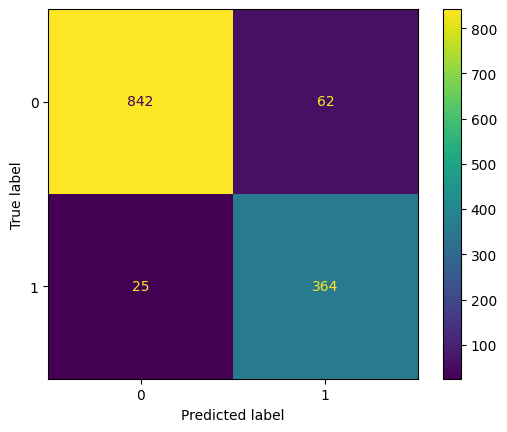

In [24]:
ConfusionMatrixDisplay(conf_matrix).plot()

scratch implementation

In [29]:
pre = precision_calc(conf_matrix)
re = recall_calc(conf_matrix)

f1 = 2* (pre*re)/(pre+re+1e-6)

print(f'f1Score:{f1}')

f1Score:0.8932510347731344


In [30]:
from sklearn.metrics import f1_score

In [31]:
print(f'f1Score:{f1_score(y_test,y_pred)}')

f1Score:0.8932515337423313


**observe**

Clearly our model is a very decent one:
- Cause even after imbalance data
- the model f1 score is great.

The difference in scratch implementation and Sklearn f1score:
- Because Sklearn uses a different value to counter zero division

**PostRead FBeta_score** https://colab.research.google.com/drive/1_FymJlX0SjSuKpYrEueMesop0UfKOh9n?ouid=108305148241143911482&usp=drive_link